<a href="https://colab.research.google.com/github/PadmaPriyaNH/VOIS_AICTE_Oct2025_NHPadmaPriya/blob/main/Airbnb_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis Project: End-to-End EDA & Insights

**Project Title:** Comprehensive Airbnb Listings Analysis with Visualizations, Dashboard, and Predictive Insights

**Author / Owner:** N H Padma Priya

**Project Description:**

This project performs a comprehensive exploratory data analysis (EDA) on Airbnb listings.
We will analyze the dataset to extract insights on pricing, availability, host behavior,
review patterns, and neighborhood trends. The project includes feature engineering,
visualizations, and a compact summary dashboard.

**Objectives:**

1. Load, clean, and standardize Airbnb dataset.
2. Engineer meaningful features for analysis.
3. Answer 35+ business and analytical questions with charts.
4. Identify trends in pricing, availability, and review patterns.
5. Summarize insights in a CSV and visual dashboard.

**Problem Statement:**

Airbnb hosts and platform managers need actionable insights to optimize pricing,
availability, and marketing strategies. This analysis will uncover:

- Pricing distribution and trends across neighborhoods and room types.
- Host performance and listing patterns.
- Review behavior and its relationship with price and availability.
- Availability and booking trends by borough and room type.

In [99]:
# =============================
# Libraries & Settings
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Visual settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme(context='notebook', style='whitegrid', palette='tab10')

print("Libraries imported and visuals configured.")

Libraries imported and visuals configured.


In [100]:
# =============================
# Load Airbnb Dataset
# =============================
excel_path = '/content/1730285881-Airbnb_Open_Data.xlsx'
text_path = 'paste.txt'

# Load all sheets into a dictionary
sheets = pd.read_excel(excel_path, sheet_name=None)
print("Sheets available:", list(sheets.keys()))

# Use first sheet as main dataset
df_airbnb = list(sheets.values())[0].copy()

# Preview first 10 rows
df_airbnb.head(10)

Sheets available: ['in']


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
6  1004650                                   BlissArtsSpace!  61300605564   
7  1005202                                   BlissArtsSpace!  90821839709   
8  1005754                   Large Furnished Room Near B'way  79384379533   
9  1006307                Cozy Clean Guest Room - Family Apt  75527839483   

  host_identity_verified host name neighbourhood group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington   
1               verified     Jenna           Manhattan             Midtown   
2                    NaN     Elise           Manhattan              Harlem   
3            unconfirmed     Garry            Brooklyn        Clinton Hill   
4               verified    Lyndon           Manhattan         East Harlem   
5               verified  Michelle           Manhattan         Murray Hill   
6                    NaN   Alberta            Brooklyn  Bedford-Stuyvesant   
7            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   
8               verified    Evelyn           Manhattan      Hell's Kitchen   
9            unconfirmed      Carl           Manhattan     Upper West Side   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United States  ...       193.0            10.0   
1  40.75362 -73.98377  United States  ...        28.0            30.0   
2  40.80902 -73.94190  United States  ...       124.0             3.0   
3  40.68514 -73.95976  United States  ...        74.0            30.0   
4  40.79851 -73.94399  United States  ...        41.0            10.0   
5  40.74767 -73.97500  United States  ...       115.0             3.0   
6  40.68688 -73.95596  United States  ...        14.0            45.0   
7  40.68688 -73.95596  United States  ...       212.0            45.0   
8  40.76489 -73.98493  United States  ...       204.0             2.0   
9  40.80178 -73.96723  United States  ...        58.0             2.0   

  number of reviews last review  reviews per month  review rate number  \
0               9.0  2021-10-19               0.21                 4.0   
1              45.0  2022-05-21               0.38                 4.0   
2               0.0         NaT                NaN                 5.0   
3             270.0  2019-07-05               4.64                 4.0   
4               9.0  2018-11-19               0.10                 3.0   
5              74.0  2019-06-22               0.59                 3.0   
6              49.0  2017-10-05               0.40                 5.0   
7              49.0  2017-10-05               0.40                 5.0   
8             430.0  2019-06-24               3.47                 3.0   
9             118.0  2017-07-21               0.99                 5.0   

   calculated host listings count  availability 365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
3                             1.0             322.0   
4                             1.0             289.0   
5                             1.0             374.0   
6                             1.0             224.0   
7                             1.0             219.0   
8                             1.0             180.0   
9                             1.0             375.0   

                                         house_rules license  
0  Clean up a

In [101]:
# =============================
# Data Cleaning & Standardization
# =============================

# Standardize column names to snake_case
df_airbnb.columns = [c.strip().lower().replace(' ', '_') for c in df_airbnb.columns]

# Convert date columns to datetime
if 'last_review' in df_airbnb.columns:
    df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')

# Convert boolean columns
if 'instant_bookable' in df_airbnb.columns:
    df_airbnb['instant_bookable'] = df_airbnb['instant_bookable'].astype(bool)

# Convert numeric columns safely
numeric_cols = [
    'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'review_rate_number', 'calculated_host_listings_count', 'availability_365',
    'lat', 'long', 'construction_year'
]
for col in numeric_cols:
    if col in df_airbnb.columns:
        df_airbnb[col] = pd.to_numeric(df_airbnb[col], errors='coerce')

# Feature Engineering
df_airbnb['price_total_first_nights'] = df_airbnb['price'] + df_airbnb.get('service_fee', 0)
df_airbnb['year_listed_proxy'] = df_airbnb.get('construction_year')
if 'neighbourhood_group' in df_airbnb.columns:
    df_airbnb['neighbourhood_group'] = df_airbnb['neighbourhood_group'].astype('category')

print("Data cleaned, types fixed, and basic features added.")
df_airbnb.info()

Data cleaned, types fixed, and basic features added.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102329 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host_name                       102191 non-null  object        
 5   neighbourhood_group             102570 non-null  category      
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  cou

#35+ Analysis Questions (EDA)

We’ll go question by question, each with charts.

### Question 1: Price Distribution

**Objective:**  
Understand the general distribution of Airbnb listing prices and detect price patterns.

**Approach:**  
- Drop missing values in the `price` column.  
- Clip extreme values at the 99th percentile to reduce skew caused by outliers.  
- Plot a histogram with KDE to visualize distribution.  
- Display key statistics: mean, median, maximum, and 99th percentile.

**Expected Insights:**  
- Most listings fall in a typical price range.  
- Identify if pricing is skewed by expensive outliers.

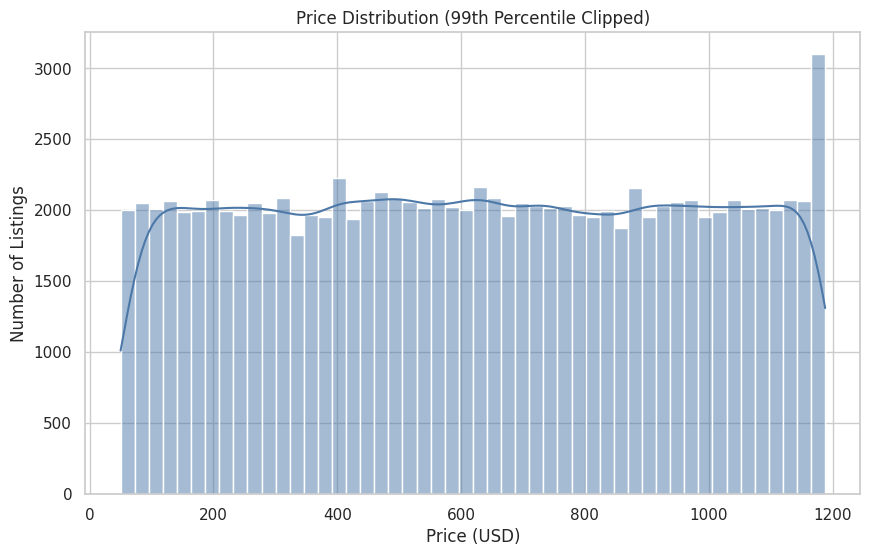

Original max price: 1200.0, 99th percentile: 1188.0
Mean price: 625.29, Median price: 624.00


In [102]:
# =============================
# Question 1: Price Distribution
# =============================
# Goal: Understand the general distribution of Airbnb listing prices.
# We'll clip extreme outliers at the 99th percentile to make the plot readable.

# Drop missing price values
prices = df_airbnb['price'].dropna()

# Clip at 99th percentile to remove extreme outliers
clip_val = np.nanpercentile(prices, 99)
prices_clip = prices.clip(upper=clip_val)

# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(prices_clip, bins=50, kde=True, color='#4C78A8')
plt.title('Price Distribution (99th Percentile Clipped)')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Listings')
plt.show()

# Quick stats
print(f"Original max price: {prices.max()}, 99th percentile: {clip_val}")
print(f"Mean price: {prices.mean():.2f}, Median price: {prices.median():.2f}")

### Question 2: Price Comparison by Room Type

**Objective:**  
Analyze how Airbnb listing prices vary across different room types.

**Approach:**  
- Use a boxplot to compare prices for each room type (`Entire home/apt`, `Private room`, `Shared room`, etc.).  
- Hide outliers in the plot to focus on the typical price range.  
- Use distinct colors for better visualization.

**Expected Insights:**  
- Identify which room types are generally more expensive.  
- Detect variability in pricing for each room type.

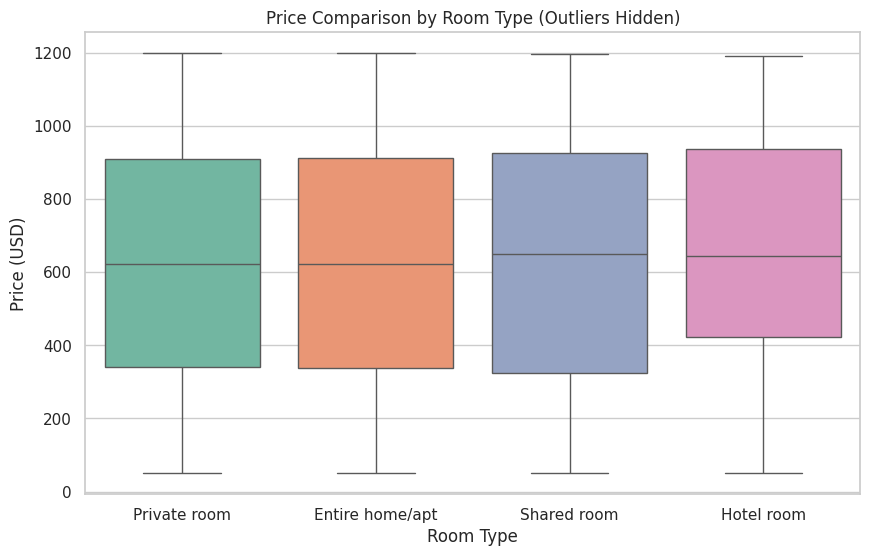

In [103]:
# =============================
# Question 2: Price by Room Type
# =============================

plt.figure(figsize=(10,6))

# Boxplot showing price by room type, hiding extreme outliers
sns.boxplot(
    data=df_airbnb,
    x='room_type',
    y='price',
    hue='room_type',    # Assign hue to use palette (future-proof)
    showfliers=False,   # Hide extreme outliers
    palette='Set2',
    dodge=False         # Keep single box per room type
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Price Comparison by Room Type (Outliers Hidden)')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.show()

### Question 3: Relationship Between Reviews per Month and Price

**Objective:**  
Examine how the number of reviews per month relates to listing prices.

**Approach:**  
- Use a scatter plot to visualize `reviews_per_month` on the x-axis and `price` on the y-axis.  
- Color points by `room_type` to see patterns across different types of listings.  
- Apply transparency (`alpha`) to handle overlapping points.  

**Expected Insights:**  
- Determine if higher-priced listings receive more or fewer reviews.  
- Identify room types that are popular despite higher prices.  
- Detect any patterns or clusters in pricing vs review activity.

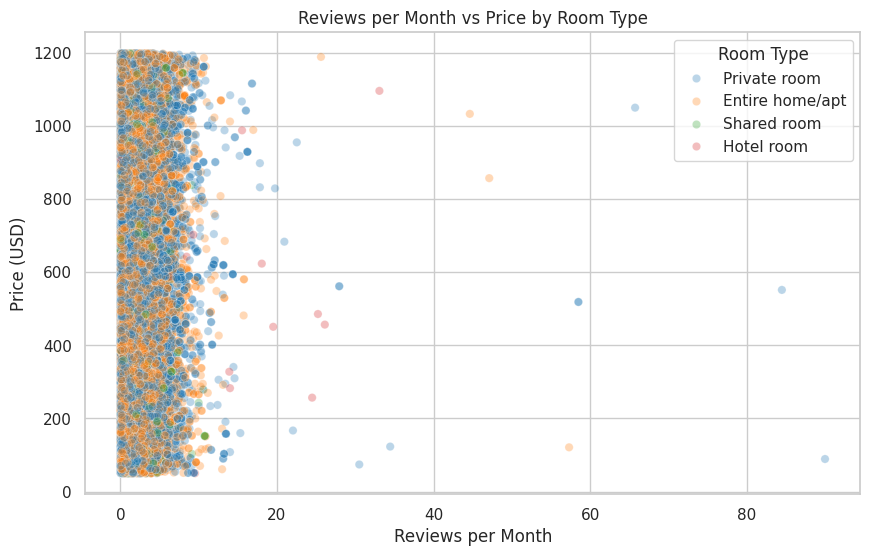

In [104]:
# =============================
# Question 3: Reviews per Month vs Price
# =============================

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_airbnb,
    x='reviews_per_month',
    y='price',
    hue='room_type',
    alpha=0.3  # Makes overlapping points transparent
)
plt.title('Reviews per Month vs Price by Room Type')
plt.xlabel('Reviews per Month')
plt.ylabel('Price (USD)')
plt.legend(title='Room Type')
plt.show()

### Question 4: Listing Availability by Borough

**Objective:**  
Analyze how Airbnb listing availability (number of days available per year) varies across different boroughs.

**Approach:**  
- Use a boxplot to compare `availability_365` for each `neighbourhood_group` (borough).  
- Hide outliers to focus on the typical range of availability.  
- Apply a pastel color palette for better visualization.

**Expected Insights:**  
- Identify which boroughs have listings available most of the year.  
- Detect boroughs with limited availability or unusual patterns.

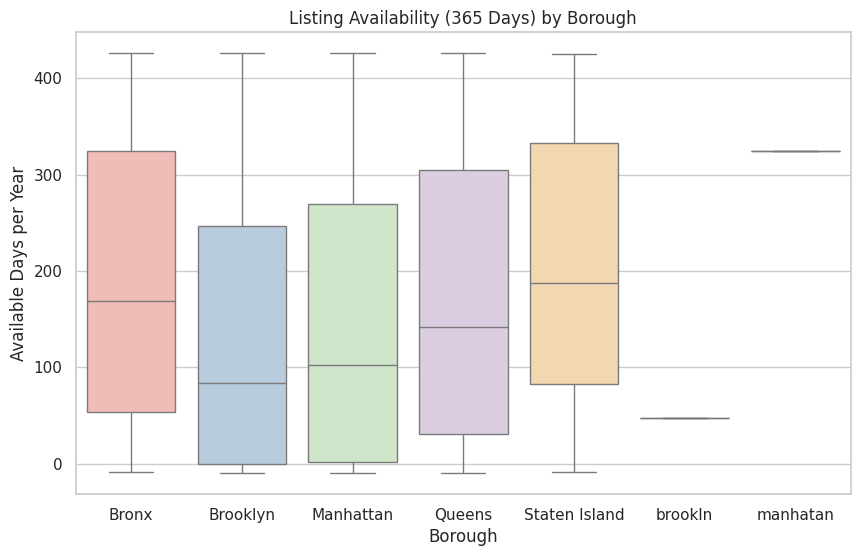

In [105]:
# =============================
# Question 4: Availability by Borough
# =============================

plt.figure(figsize=(10,6))

# Boxplot showing availability by borough, hiding extreme outliers
sns.boxplot(
    data=df_airbnb,
    x='neighbourhood_group',
    y='availability_365',
    hue='neighbourhood_group',  # Assign hue to use palette (future-proof)
    showfliers=False,            # Hide extreme outliers
    palette='Pastel1',
    dodge=False                  # Keep single box per borough
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Listing Availability (365 Days) by Borough')
plt.xlabel('Borough')
plt.ylabel('Available Days per Year')
plt.show()

### Question 5: Top 15 Neighborhoods by Number of Listings

**Objective:**  
Identify the neighborhoods with the highest number of Airbnb listings.

**Approach:**  
- Count the number of listings per `neighbourhood`.  
- Select the top 15 neighborhoods.  
- Use a horizontal bar plot for better readability, with a color palette to highlight differences.

**Expected Insights:**  
- Determine which neighborhoods are most popular among Airbnb hosts.  
- Understand the concentration of listings in the city.

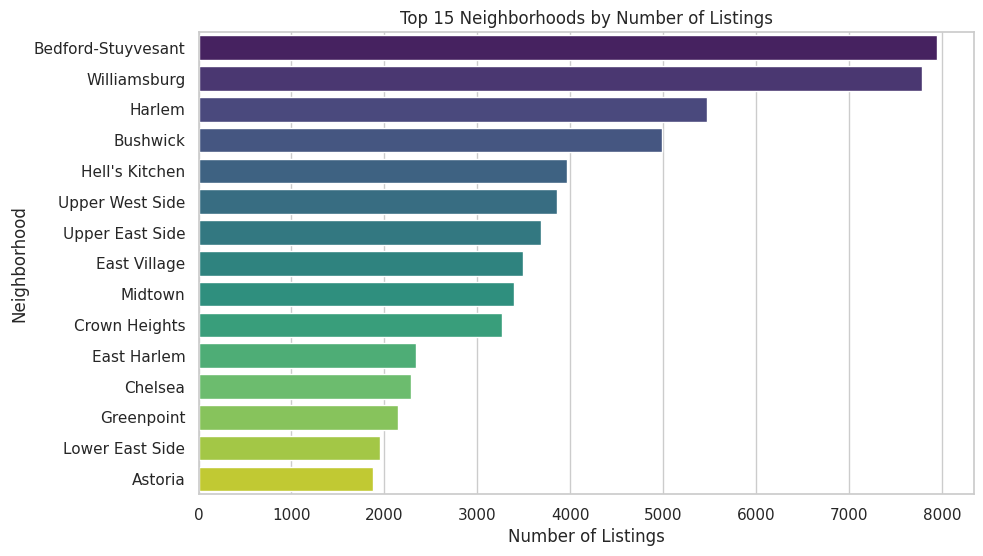

In [106]:
# =============================
# Question 5: Top 15 Neighborhoods by Number of Listings
# =============================

# Count listings per neighborhood
top_neigh = df_airbnb['neighbourhood'].value_counts().head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))

sns.barplot(
    x=top_neigh.values,
    y=top_neigh.index,
    hue=top_neigh.index,   # Assign hue to use palette (future-proof)
    palette='viridis',
    dodge=False             # Keep single bar per neighborhood
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Top 15 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

### Question 6: Instant Bookable Share by Borough

**Objective:**  
Analyze the proportion of listings that are instant bookable in each borough.

**Approach:**  
- Group the data by `neighbourhood_group` (borough).  
- Calculate the mean of the boolean column `instant_bookable` to get the share.  
- Plot a horizontal bar chart to compare boroughs.  
- Use a distinct color palette for clarity.

**Expected Insights:**  
- Identify which boroughs have more listings available for instant booking.  
- Help hosts or users understand booking trends by area.

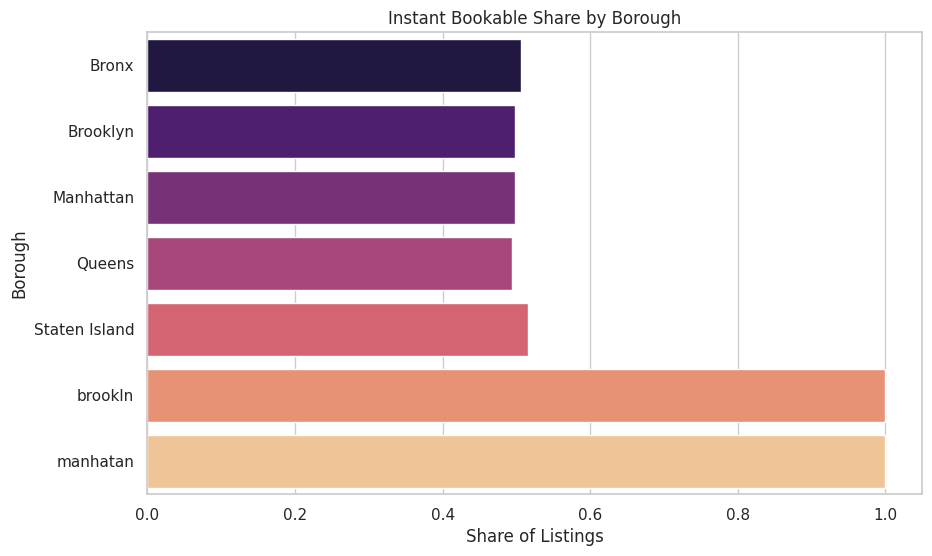

In [107]:
# =============================
# Question 6: Instant Bookable Share by Borough
# =============================

# Calculate share of instant bookable listings by borough
share = df_airbnb.groupby('neighbourhood_group', observed=True)['instant_bookable'].mean()\
    .dropna().sort_values(ascending=False)  # observed=True fixes future pandas warning

# Plot horizontal bar chart
plt.figure(figsize=(10,6))

sns.barplot(
    x=share.values,
    y=share.index,
    hue=share.index,   # Assign hue to use palette (future-proof)
    palette='magma',
    dodge=False        # Keep single bar per borough
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Instant Bookable Share by Borough')
plt.xlabel('Share of Listings')
plt.ylabel('Borough')
plt.show()

### Question 7: Price Comparison by Borough

**Objective:**  
Compare the distribution of Airbnb listing prices across different boroughs.

**Approach:**  
- Use a boxplot to compare `price` across `neighbourhood_group` (borough).  
- Hide outliers to focus on the typical price range.  
- Use a distinct color palette for visual clarity.

**Expected Insights:**  
- Identify which boroughs generally have higher-priced listings.  
- Detect variability in prices within each borough.

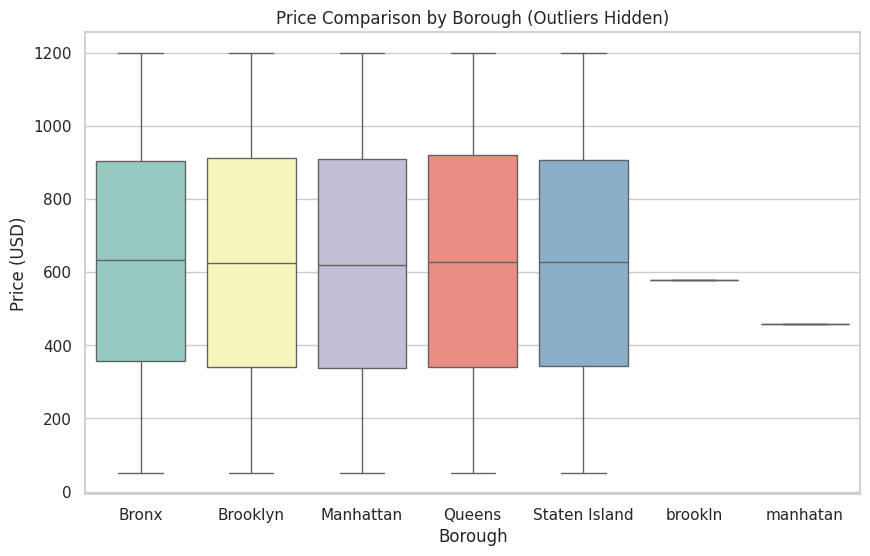

In [108]:
# =============================
# Question 7: Price by Borough
# =============================

plt.figure(figsize=(10,6))

# Boxplot showing price by borough, hiding extreme outliers
sns.boxplot(
    data=df_airbnb,
    x='neighbourhood_group',
    y='price',
    hue='neighbourhood_group',  # Assign hue to use palette (future-proof)
    showfliers=False,           # Hide extreme outliers
    palette='Set3',
    dodge=False                 # Keep single box per borough
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Price Comparison by Borough (Outliers Hidden)')
plt.xlabel('Borough')
plt.ylabel('Price (USD)')
plt.show()


### Question 8: Distribution of Minimum Nights

**Objective:**  
Examine the distribution of the `minimum_nights` required for Airbnb listings.

**Approach:**  
- Plot a histogram to show the spread of minimum nights.  
- Clip extreme values at the 95th percentile to focus on the majority of listings.  
- Use a distinct color for readability.

**Expected Insights:**  
- Understand typical minimum night requirements for listings.  
- Identify any listings with unusually high minimum nights, which may be outliers or long-term rentals.

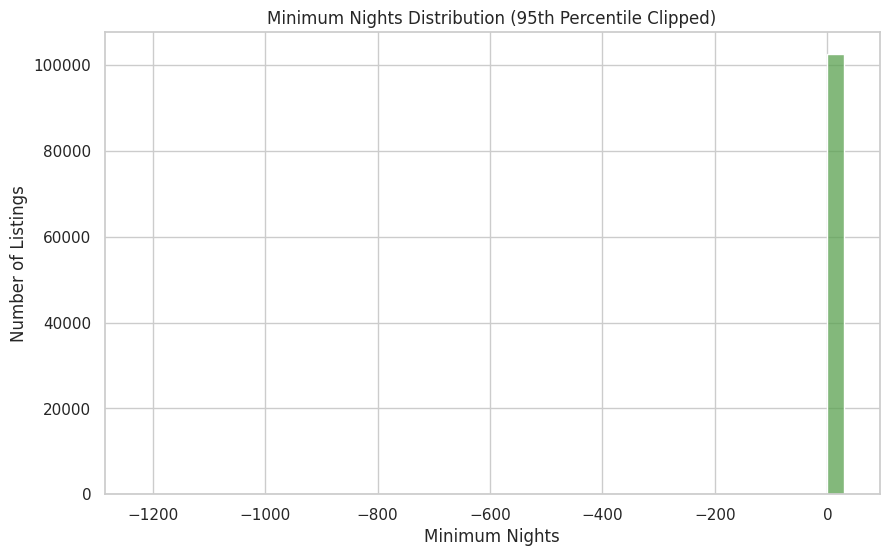

Mean minimum nights: 8.10, Median: 3.00, 95th percentile: 30.0


In [109]:
# =============================
# Question 8: Minimum Nights Distribution
# =============================

# Fill missing values and clip at 95th percentile
mn = df_airbnb['minimum_nights'].fillna(0)
clip_mn = np.nanpercentile(mn, 95)

plt.figure(figsize=(10,6))
sns.histplot(
    mn.clip(upper=clip_mn),
    bins=40,
    color='#59A14F'
)
plt.title('Minimum Nights Distribution (95th Percentile Clipped)')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Listings')
plt.show()

# Quick statistics
print(f"Mean minimum nights: {mn.mean():.2f}, Median: {mn.median():.2f}, 95th percentile: {clip_mn}")

### Question 9: Price vs Minimum Nights

**Objective:**  
Investigate the relationship between listing prices and minimum nights required.

**Approach:**  
- Create a scatter plot with `minimum_nights` on the x-axis and `price` on the y-axis.  
- Color points by `room_type` to observe patterns across different listing types.  
- Sample up to 5000 points to reduce overplotting and improve readability.  
- Apply transparency (`alpha`) for overlapping points.

**Expected Insights:**  
- Identify if longer minimum night listings tend to have higher prices.  
- Detect clusters or unusual patterns in the dataset.

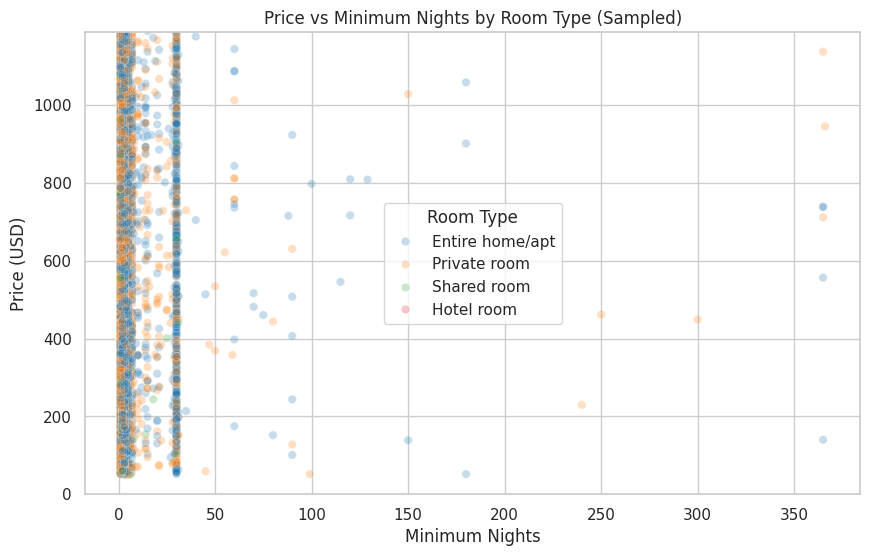

In [110]:
# =============================
# Question 9: Price vs Minimum Nights
# =============================

# Sample data to reduce overplotting
sample_size = min(5000, len(df_airbnb))
df_sample = df_airbnb.sample(sample_size, random_state=42)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_sample,
    x='minimum_nights',
    y='price',
    hue='room_type',
    alpha=0.25
)
plt.title('Price vs Minimum Nights by Room Type (Sampled)')
plt.xlabel('Minimum Nights')
plt.ylabel('Price (USD)')
plt.ylim(0, np.nanpercentile(df_airbnb['price'], 99))  # Clip y-axis to 99th percentile
plt.legend(title='Room Type')
plt.show()

### Question 10: Availability vs Price by Room Type

**Objective:**  
Analyze how listing availability (days per year) relates to price, considering different room types.

**Approach:**  
- Create a scatter plot with `availability_365` on the x-axis and `price` on the y-axis.  
- Color points by `room_type` to observe patterns across listing types.  
- Sample up to 6000 points to reduce overplotting.  
- Apply transparency (`alpha`) to make dense regions visible.  

**Expected Insights:**  
- Determine if highly available listings tend to have higher or lower prices.  
- Compare availability patterns across room types.  
- Detect potential clusters or outliers.

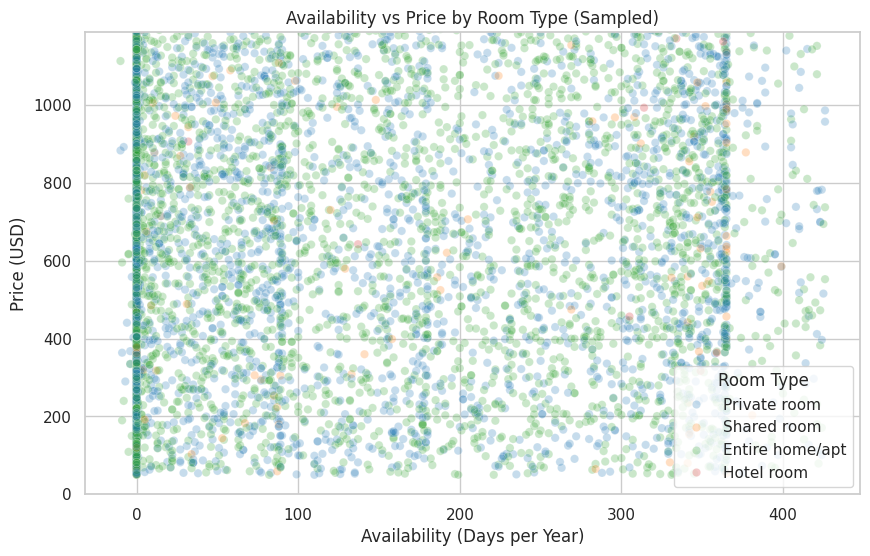

In [111]:
# =============================
# Question 10: Availability vs Price by Room Type
# =============================

# Sample data to reduce overplotting
sample_size = min(6000, len(df_airbnb))
df_sample = df_airbnb.sample(sample_size, random_state=1)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_sample,
    x='availability_365',
    y='price',
    hue='room_type',
    alpha=0.25
)
plt.title('Availability vs Price by Room Type (Sampled)')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price (USD)')
plt.ylim(0, np.nanpercentile(df_airbnb['price'], 99))  # Clip extreme prices
plt.legend(title='Room Type')
plt.show()

### Question 11: Share of Multi-Listing Hosts

**Objective:**  
Determine what proportion of hosts manage multiple listings versus single listings.

**Approach:**  
- Count the number of listings per `host_id`.  
- Define multi-listing hosts as those with 3 or more listings.  
- Calculate the share of multi-listing hosts versus single/pair listing hosts.  
- Plot a horizontal bar chart to visualize the proportions.

**Expected Insights:**  
- Identify how many hosts dominate the Airbnb market with multiple listings.  
- Understand market concentration and potential influence of multi-listing hosts.

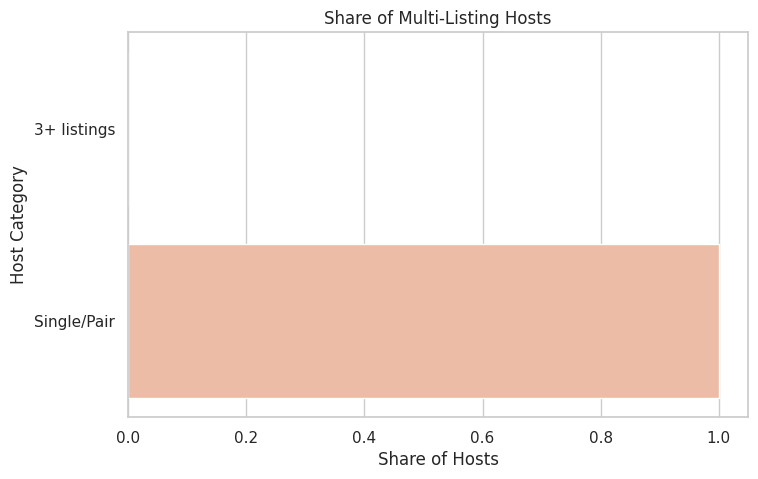

Share of multi-listing hosts (3+ listings): 0.00%
Share of single/pair listing hosts: 100.00%


In [112]:
# =============================
# Question 11: Multi-Listing Hosts Share
# =============================

# Count listings per host
host_counts = df_airbnb['host_id'].value_counts()

# Calculate share
share_multi = (host_counts >= 3).mean()
share_single = 1 - share_multi

# Plot horizontal bar chart
plt.figure(figsize=(8,5))

sns.barplot(
    x=[share_multi, share_single],
    y=['3+ listings', 'Single/Pair'],
    hue=['3+ listings', 'Single/Pair'],  # Assign hue to use palette (future-proof)
    palette='coolwarm',
    dodge=False                          # Keep single bar per category
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Share of Multi-Listing Hosts')
plt.xlabel('Share of Hosts')
plt.ylabel('Host Category')
plt.show()

# Print exact shares
print(f"Share of multi-listing hosts (3+ listings): {share_multi:.2%}")
print(f"Share of single/pair listing hosts: {share_single:.2%}")

### Question 12: Top 15 Hosts by Listing Count

**Objective:**  
Identify the hosts who manage the largest number of listings.

**Approach:**  
- Count the number of listings per `host_id`.  
- Select the top 15 hosts by listing count.  
- Plot a horizontal bar chart for better readability.  
- Use a color palette to visually differentiate the hosts.

**Expected Insights:**  
- Recognize the most active hosts on the platform.  
- Understand the impact of these hosts on the overall market.

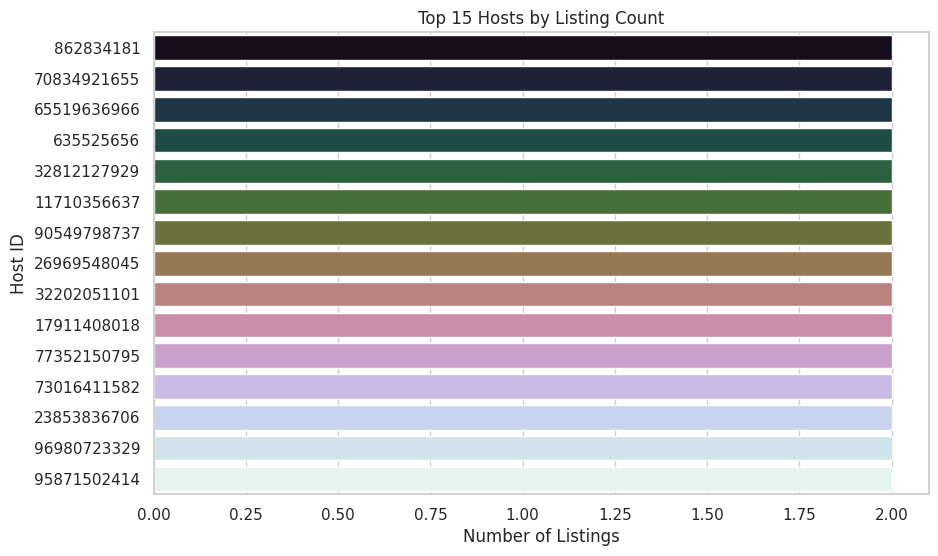

In [113]:
# =============================
# Question 12: Top 15 Hosts by Listing Count
# =============================

# Count listings per host
host_counts = df_airbnb['host_id'].value_counts().head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))

sns.barplot(
    x=host_counts.values,
    y=host_counts.index.astype(str),
    hue=host_counts.index.astype(str),  # Assign hue to use palette (future-proof)
    palette='cubehelix',
    dodge=False                          # Keep single bar per host
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Top 15 Hosts by Listing Count')
plt.xlabel('Number of Listings')
plt.ylabel('Host ID')
plt.show()

### Question 13: Price by Neighborhood (Top 12 by Listing Count)

**Objective:**  
Analyze how listing prices vary across the most popular neighborhoods.

**Approach:**  
- Identify the top 12 neighborhoods by number of listings.  
- Use a boxplot to compare `price` across these neighborhoods.  
- Hide outliers to focus on typical pricing.  
- Rotate x-axis labels for readability.

**Expected Insights:**  
- Determine which neighborhoods are generally more expensive.  
- Observe price variability within popular neighborhoods.

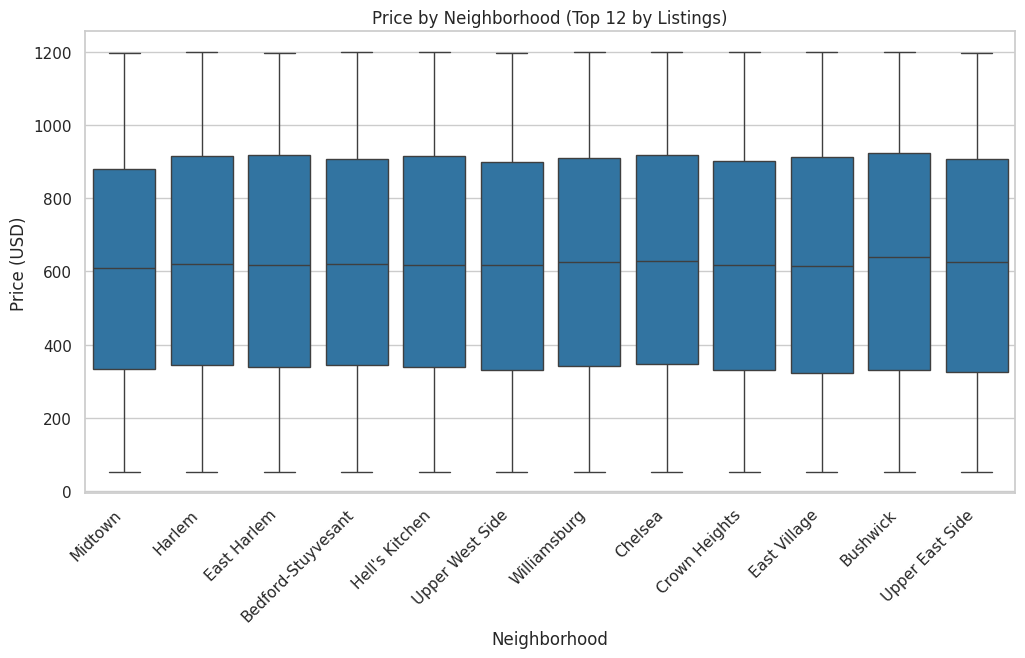

In [114]:
# =============================
# Question 13: Price per Neighborhood (Top 12 by Listing Count)
# =============================

# Identify top 12 neighborhoods by listing count
top_neigh = df_airbnb['neighbourhood'].value_counts().head(12).index

# Plot boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_airbnb[df_airbnb['neighbourhood'].isin(top_neigh)],
    x='neighbourhood',
    y='price',
    showfliers=False
)
plt.title('Price by Neighborhood (Top 12 by Listings)')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Question 14: Distribution of Number of Reviews

**Objective:**  
Examine how the number of reviews is distributed across listings.

**Approach:**  
- Use a histogram to visualize the `number_of_reviews` column.  
- Clip values at the 99th percentile to reduce skew caused by listings with extremely high review counts.  
- Use a distinct color for better readability.

**Expected Insights:**  
- Understand how many listings receive frequent reviews.  
- Identify listings with unusually high or low review activity.

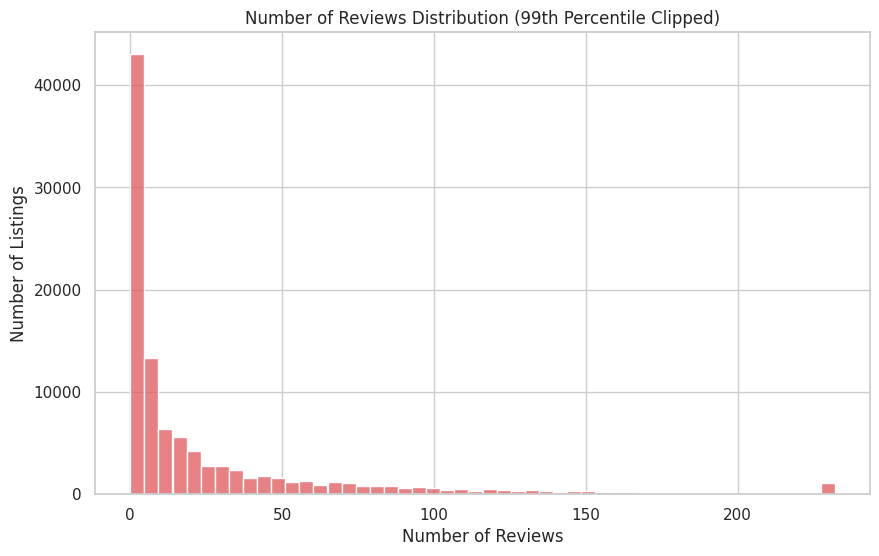

Mean reviews: 27.43, Median: 7.00, 99th percentile: 232.0


In [115]:
# =============================
# Question 14: Number of Reviews Distribution
# =============================

# Fill missing values and clip at 99th percentile
reviews = df_airbnb['number_of_reviews'].fillna(0)
clip_rv = np.nanpercentile(reviews, 99)

plt.figure(figsize=(10,6))
sns.histplot(
    reviews.clip(upper=clip_rv),
    bins=50,
    color='#E15759'
)
plt.title('Number of Reviews Distribution (99th Percentile Clipped)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

# Quick statistics
print(f"Mean reviews: {reviews.mean():.2f}, Median: {reviews.median():.2f}, 99th percentile: {clip_rv}")

### Question 15: Last Review Recency by Year

**Objective:**  
Analyze the recency of the last reviews for Airbnb listings.

**Approach:**  
- Extract the year from the `last_review` column.  
- Use a count plot to visualize the number of listings with their last review in each year.  
- Drop missing values to focus on valid review dates.

**Expected Insights:**  
- Identify trends in review activity over the years.  
- Determine whether listings are actively receiving reviews or have been inactive for long periods.

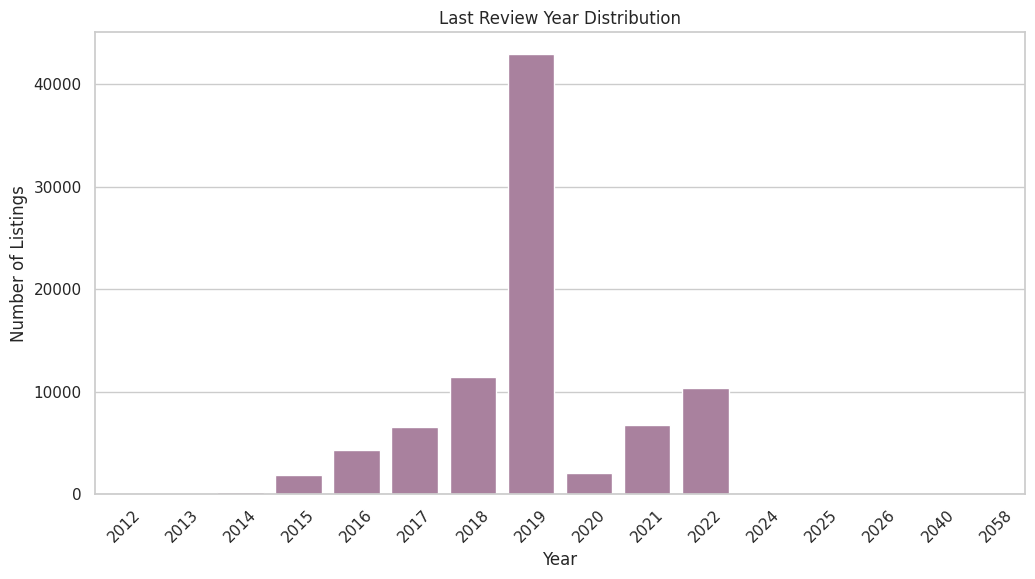

In [116]:
# =============================
# Question 15: Last Review Recency by Year
# =============================

if 'last_review' in df_airbnb.columns:
    # Extract year from last_review
    last_review_year = pd.to_datetime(df_airbnb['last_review'], errors='coerce').dt.year

    plt.figure(figsize=(12,6))
    sns.countplot(
        x=last_review_year.dropna().astype(int),
        color='#B07AA1'
    )
    plt.title('Last Review Year Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)
    plt.show()

### Question 16: Room Type Mix by Borough

**Objective:**  
Examine the composition of room types across different boroughs.

**Approach:**  
- Group the data by `neighbourhood_group` (borough) and `room_type`.  
- Calculate the share of each room type within each borough.  
- Use a stacked or grouped bar plot to visualize the room type distribution.

**Expected Insights:**  
- Identify which room types are more prevalent in each borough.  
- Understand market composition and availability options for guests.

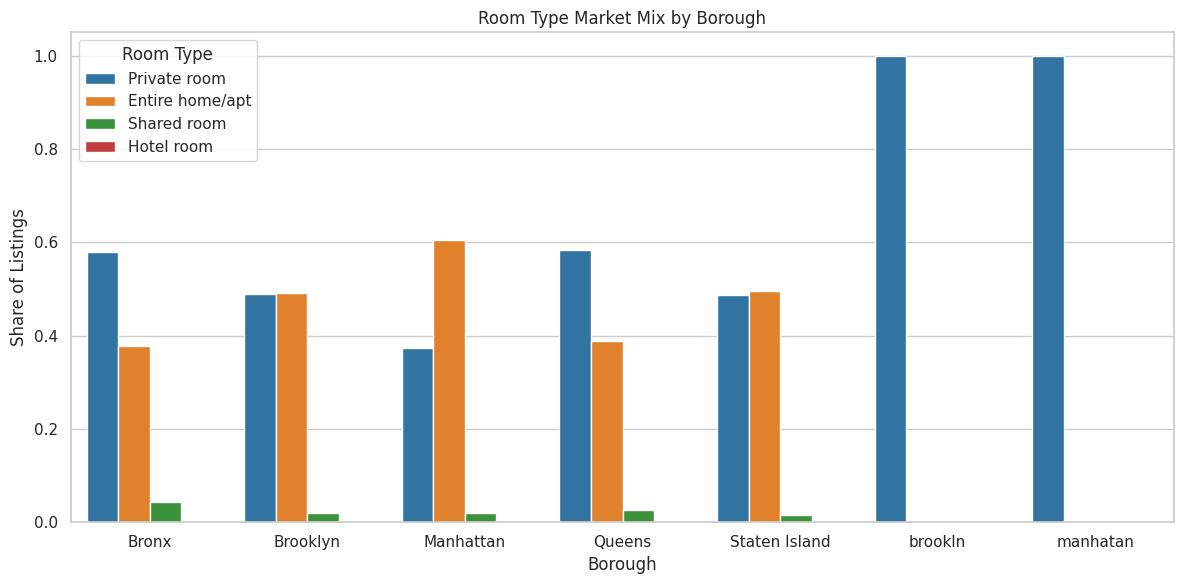

In [117]:
# =============================
# Question 16: Room Type Mix by Borough
# =============================

# Calculate room type share by borough
mix = (df_airbnb.groupby('neighbourhood_group', observed=True)['room_type']
       .value_counts(normalize=True)
       .reset_index(name='share'))  # observed=True fixes future pandas warning

plt.figure(figsize=(12,6))

# Barplot showing room type share by borough
sns.barplot(
    data=mix,
    x='neighbourhood_group',
    y='share',
    hue='room_type'
)

plt.title('Room Type Market Mix by Borough')
plt.xlabel('Borough')
plt.ylabel('Share of Listings')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

### Question 17: Price vs Number of Reviews

**Objective:**  
Examine how listing prices relate to the number of reviews.

**Approach:**  
- Use a scatter plot with `number_of_reviews` on the x-axis and `price` on the y-axis.  
- Sample points to reduce overplotting.  
- Apply transparency for dense areas.

**Expected Insights:**  
- Identify if highly-reviewed listings tend to have higher prices.  
- Detect clusters or outliers in the price-review relationship.

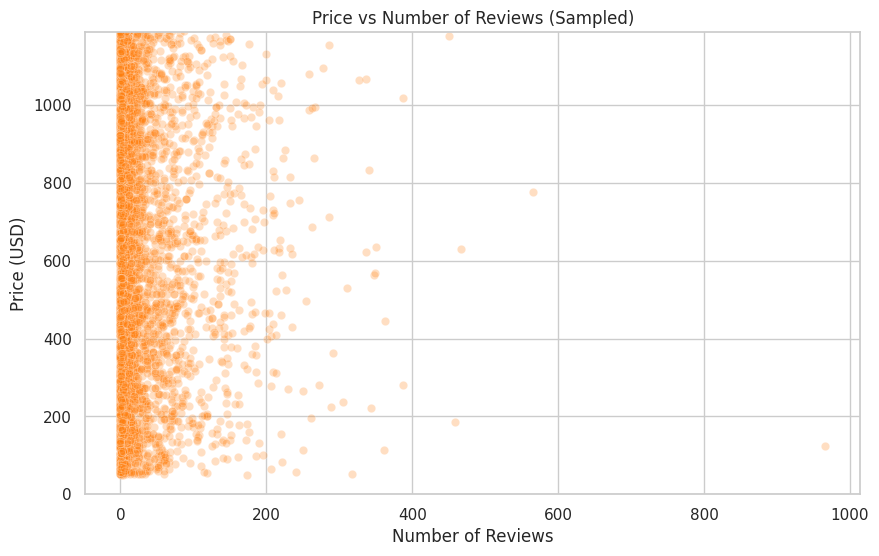

In [118]:
# =============================
# Question 17 (Alternative): Price vs Number of Reviews
# =============================

# Sample to reduce overplotting
sample_size = min(5000, len(df_airbnb))
df_sample = df_airbnb.sample(sample_size, random_state=42)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_sample,
    x='number_of_reviews',
    y='price',
    alpha=0.25,
    color='#FF7F0E'
)
plt.title('Price vs Number of Reviews (Sampled)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (USD)')
plt.ylim(0, np.nanpercentile(df_airbnb['price'], 99))  # Clip extreme prices
plt.show()

### Question 18: Price vs Availability Buckets

**Objective:**  
Examine how listing prices vary across different availability ranges.

**Approach:**  
- Categorize `availability_365` into buckets: 0–30, 31–90, 91–180, 181–365 days.  
- Use a boxplot to visualize `price` for each availability bucket.  
- Include `room_type` as hue to see differences across listing types.  
- Hide extreme price outliers for clarity.

**Expected Insights:**  
- Identify if listings with limited or high availability have different pricing patterns.  
- Compare availability patterns across room types.

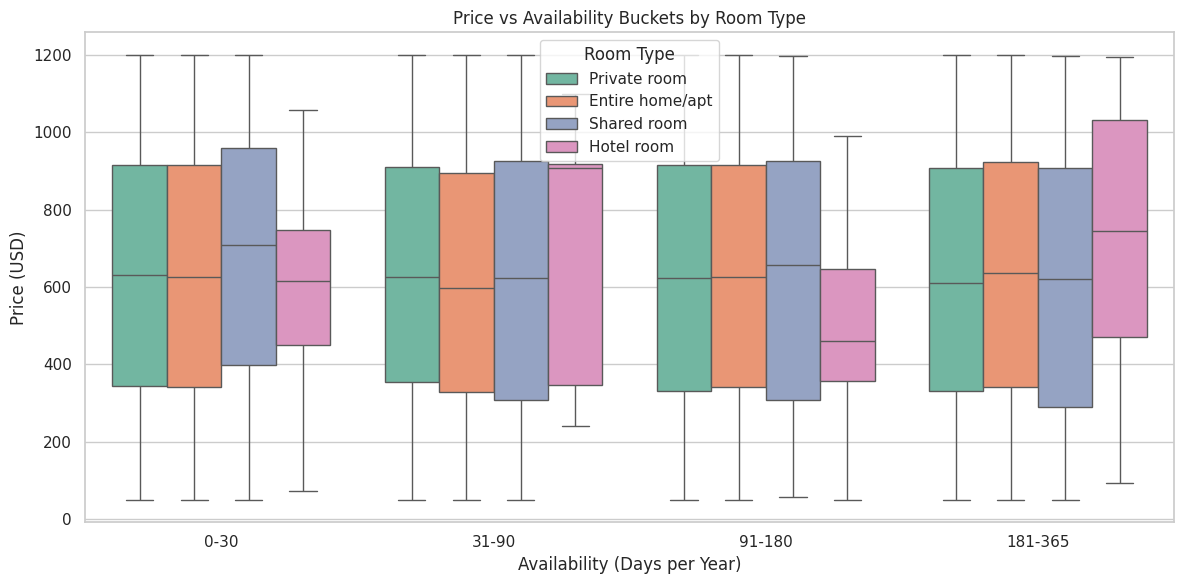

In [119]:
# =============================
# Question 18: Price vs Availability Buckets
# =============================

if 'availability_365' in df_airbnb.columns:
    df_av = df_airbnb[['availability_365','price','room_type']].dropna()

    # Define availability buckets
    bins = [0,30,90,180,365]
    labels = ['0-30','31-90','91-180','181-365']
    df_av['avail_bucket'] = pd.cut(df_av['availability_365'], bins=bins, labels=labels, include_lowest=True)

    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=df_av,
        x='avail_bucket',
        y='price',
        hue='room_type',
        showfliers=False,
        palette='Set2'
    )
    plt.title('Price vs Availability Buckets by Room Type')
    plt.xlabel('Availability (Days per Year)')
    plt.ylabel('Price (USD)')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()

### Question 19: Minimum Nights Policy Mix by Borough

**Objective:**  
Analyze the distribution of minimum night policies across boroughs.

**Approach:**  
- Categorize `minimum_nights` into buckets: 1–2, 3–7, 8–14, 15–30, 31+ nights.  
- Group data by `neighbourhood_group` and bucket.  
- Calculate the share of listings in each bucket for each borough.  
- Use a grouped bar plot to visualize the policy mix.

**Expected Insights:**  
- Identify which boroughs have stricter minimum night requirements.  
- Compare the prevalence of short-term vs. long-term listing policies across boroughs.

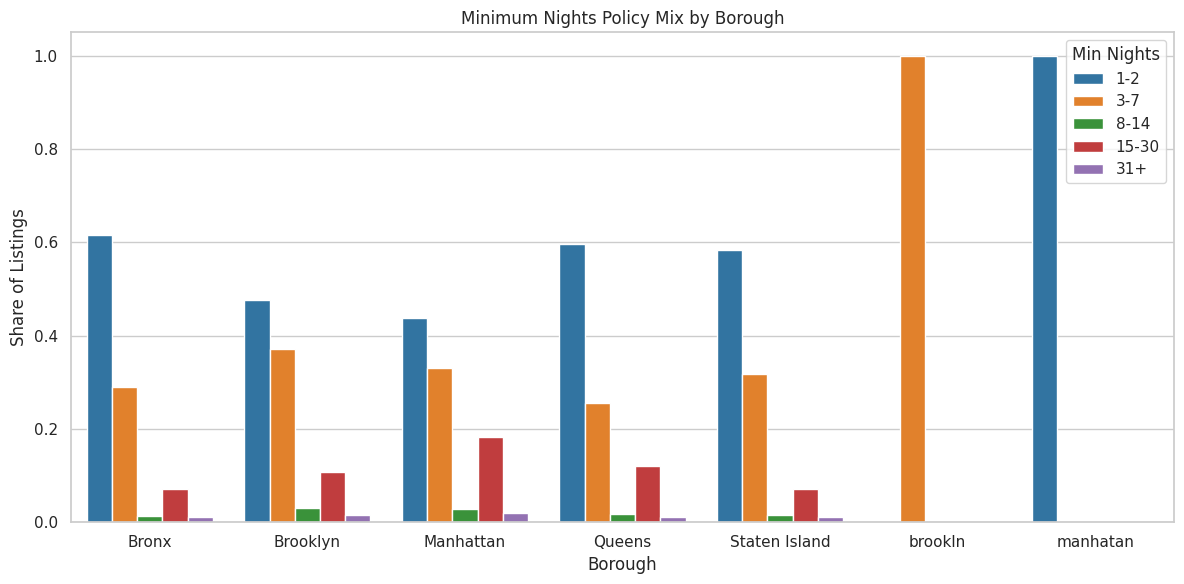

In [120]:
# =============================
# Question 19: Minimum Nights Policy Mix by Borough
# =============================

if 'minimum_nights' in df_airbnb.columns:
    df_mn = df_airbnb[['neighbourhood_group','minimum_nights']].dropna()

    # Define minimum nights buckets
    bins_mn = [0,2,7,14,30,9999]
    labels_mn = ['1-2','3-7','8-14','15-30','31+']
    df_mn['min_nights_bucket'] = pd.cut(df_mn['minimum_nights'],
                                        bins=bins_mn,
                                        labels=labels_mn,
                                        include_lowest=True)

    # Calculate share by borough
    mn_mix = df_mn.groupby(['neighbourhood_group','min_nights_bucket'], observed=True)\
                   .size().reset_index(name='n')  # observed=True fixes future pandas warning
    mn_mix['share'] = mn_mix.groupby('neighbourhood_group', observed=True)['n']\
                            .transform(lambda s: s / s.sum())  # observed=True fixes future pandas warning

    plt.figure(figsize=(12,6))

    # Barplot showing minimum nights policy mix by borough
    sns.barplot(
        data=mn_mix,
        x='neighbourhood_group',
        y='share',
        hue='min_nights_bucket'
    )

    plt.title('Minimum Nights Policy Mix by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Share of Listings')
    plt.legend(title='Min Nights')
    plt.tight_layout()
    plt.show()

### Question 20: Geographic Hexbin of Average Price

**Objective:**  
Visualize how average Airbnb prices vary geographically across the city.

**Approach:**  
- Use `latitude` and `longitude` columns to plot listings.  
- Apply a hexbin plot to aggregate listings into hexagonal bins.  
- Color bins by the average `price` in each area.  
- Use a color map for clear visual representation.

**Expected Insights:**  
- Identify neighborhoods with higher average prices.  
- Detect geographical price clusters and hotspots.

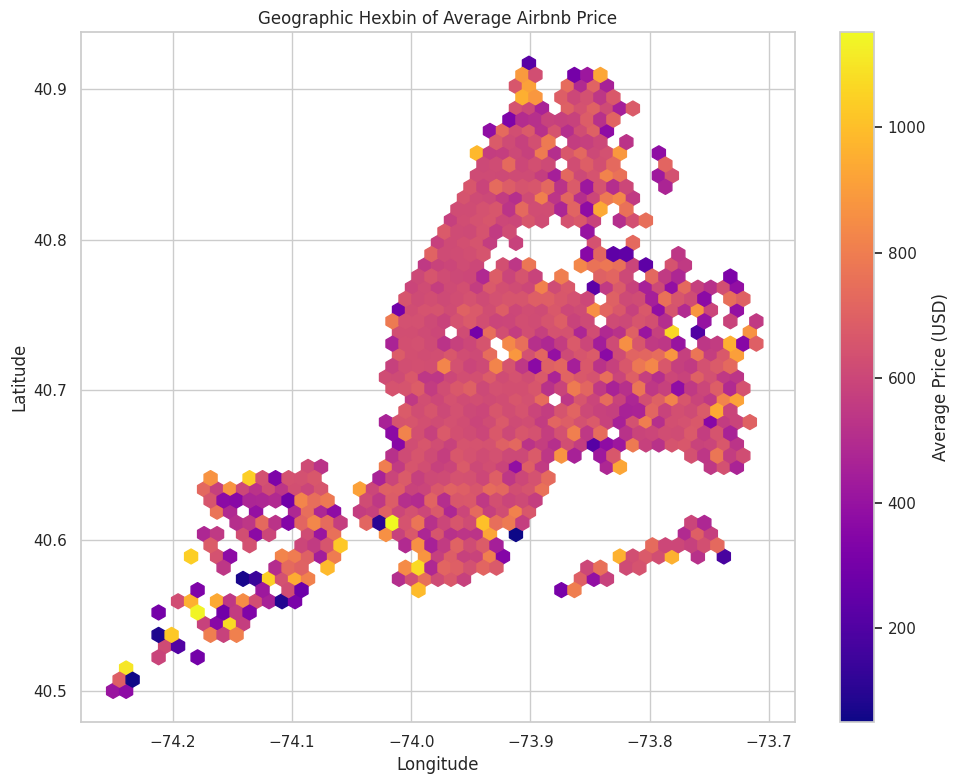

In [121]:
# =============================
# Question 20: Geographic Hexbin of Average Price
# =============================

if {'lat','long'}.issubset(df_airbnb.columns):
    df_geo = df_airbnb[['lat','long','price']].dropna()

    plt.figure(figsize=(10,8))
    hb = plt.hexbin(
        df_geo['long'],
        df_geo['lat'],
        C=df_geo['price'],
        gridsize=50,
        reduce_C_function=np.mean,
        cmap='plasma'
    )
    plt.colorbar(hb, label='Average Price (USD)')
    plt.title('Geographic Hexbin of Average Airbnb Price')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

### Question 21: Top Neighborhoods by Number of Listings

**Objective:**  
Identify neighborhoods with the highest number of Airbnb listings.

**Approach:**  
- Count listings per `neighbourhood`.  
- Select the top 15 neighborhoods by listing count.  
- Use a horizontal bar plot for better readability.

**Expected Insights:**  
- Understand which neighborhoods are most popular for Airbnb hosts.  
- Identify potential areas with high listing density and competition.

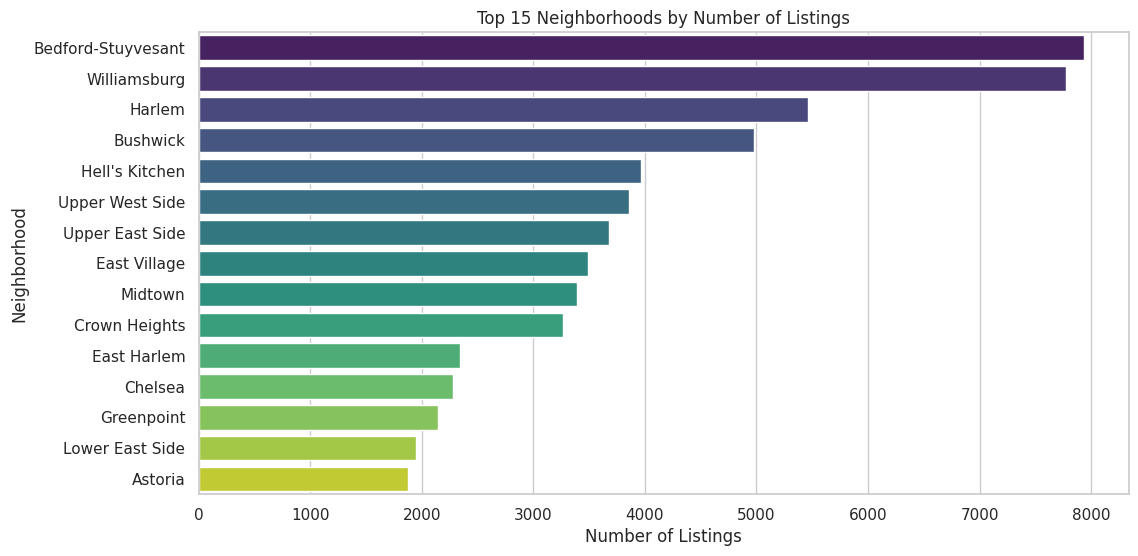

In [122]:
# =============================
# Question 21: Top Neighborhoods by Number of Listings
# =============================

# Count listings per neighborhood
top_neigh_counts = df_airbnb['neighbourhood'].value_counts().head(15)

# Plot horizontal bar chart
plt.figure(figsize=(12,6))

sns.barplot(
    x=top_neigh_counts.values,
    y=top_neigh_counts.index,
    hue=top_neigh_counts.index,  # Assign hue to use palette (future-proof)
    palette='viridis',
    dodge=False                  # Keep single bar per neighborhood
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Top 15 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

### Question 22: Instant Bookable Share by Borough

**Objective:**  
Analyze the proportion of listings that are instant bookable across different boroughs.

**Approach:**  
- Group data by `neighbourhood_group` (borough).  
- Calculate the mean of the boolean `instant_bookable` column to get the share of listings that can be booked instantly.  
- Use a bar plot to visualize the instant bookable share per borough.

**Expected Insights:**  
- Identify which boroughs favor instant booking.  
- Understand the prevalence of flexible booking options in the market.

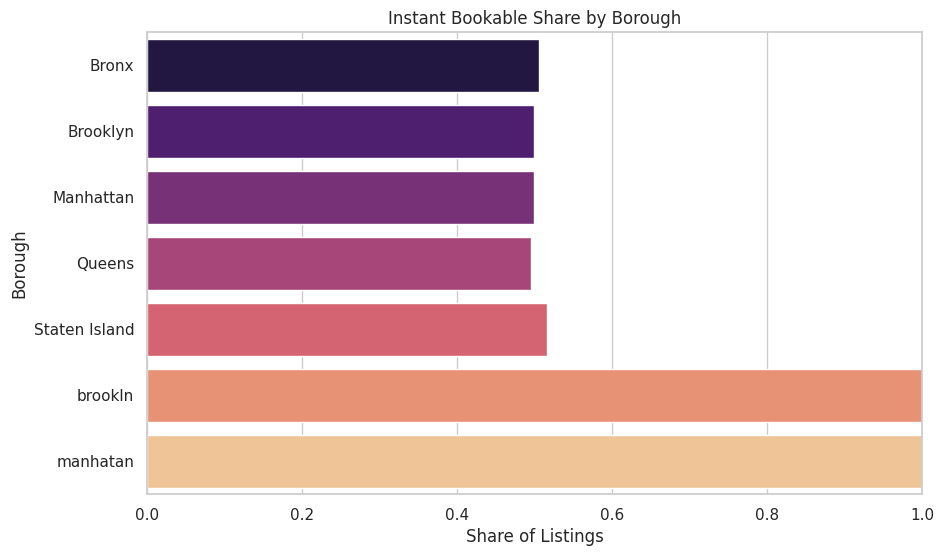

In [123]:
# =============================
# Question 22: Instant Bookable Share by Borough
# =============================

if 'instant_bookable' in df_airbnb.columns:
    # Calculate share of instant bookable listings by borough
    share = df_airbnb.groupby('neighbourhood_group', observed=True)['instant_bookable']\
                      .mean().dropna().sort_values(ascending=False)  # observed=True fixes pandas warning

    plt.figure(figsize=(10,6))

    sns.barplot(
        x=share.values,
        y=share.index,
        hue=share.index,   # Assign hue to use palette (future-proof)
        palette='magma',
        dodge=False        # Keep single bar per borough
    )

    plt.legend([], [], frameon=False)  # Remove redundant legend

    plt.title('Instant Bookable Share by Borough')
    plt.xlabel('Share of Listings')
    plt.ylabel('Borough')
    plt.xlim(0,1)
    plt.show()

### Question 23: Multi-Listing Hosts Share

**Objective:**  
Determine the proportion of Airbnb hosts who manage multiple listings versus single listings.

**Approach:**  
- Count the number of listings per `host_id`.  
- Define multi-listing hosts as those with 3 or more listings.  
- Visualize the share of multi-listing vs single/pair hosts using a bar plot.

**Expected Insights:**  
- Understand host concentration in the market.  
- Identify whether most listings are managed by individual hosts or professional hosts with multiple properties.

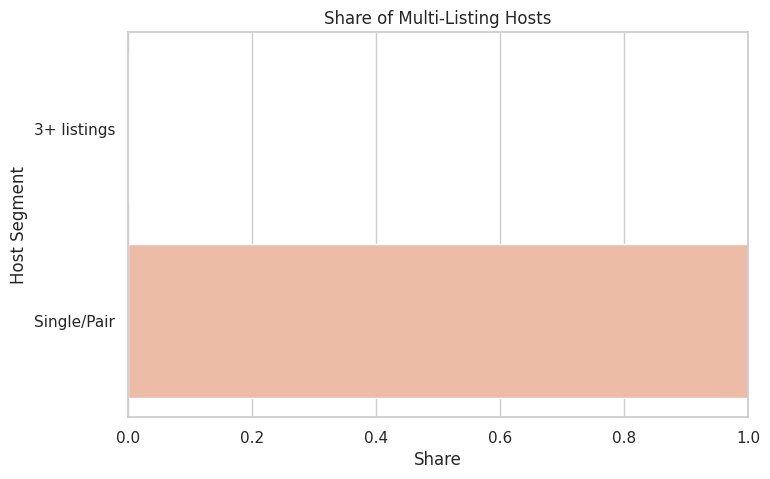

In [124]:
# =============================
# Question 23: Multi-Listing Hosts Share
# =============================

# Count listings per host
host_counts = df_airbnb['host_id'].value_counts()

# Define multi-listing share
share_multi = (host_counts >= 3).mean()

plt.figure(figsize=(8,5))

sns.barplot(
    x=[share_multi, 1-share_multi],
    y=['3+ listings','Single/Pair'],
    hue=['3+ listings','Single/Pair'],  # Assign hue to use palette (future-proof)
    palette='coolwarm',
    dodge=False                           # Keep single bar per category
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Share of Multi-Listing Hosts')
plt.xlabel('Share')
plt.ylabel('Host Segment')
plt.xlim(0,1)
plt.show()

### Question 24: Top 15 Hosts by Listing Count

**Objective:**  
Identify the hosts with the highest number of Airbnb listings.

**Approach:**  
- Count the number of listings per `host_id`.  
- Select the top 15 hosts with the most listings.  
- Use a horizontal bar plot to visualize these top hosts.

**Expected Insights:**  
- Highlight hosts with significant market presence.  
- Understand concentration of listings among professional hosts.

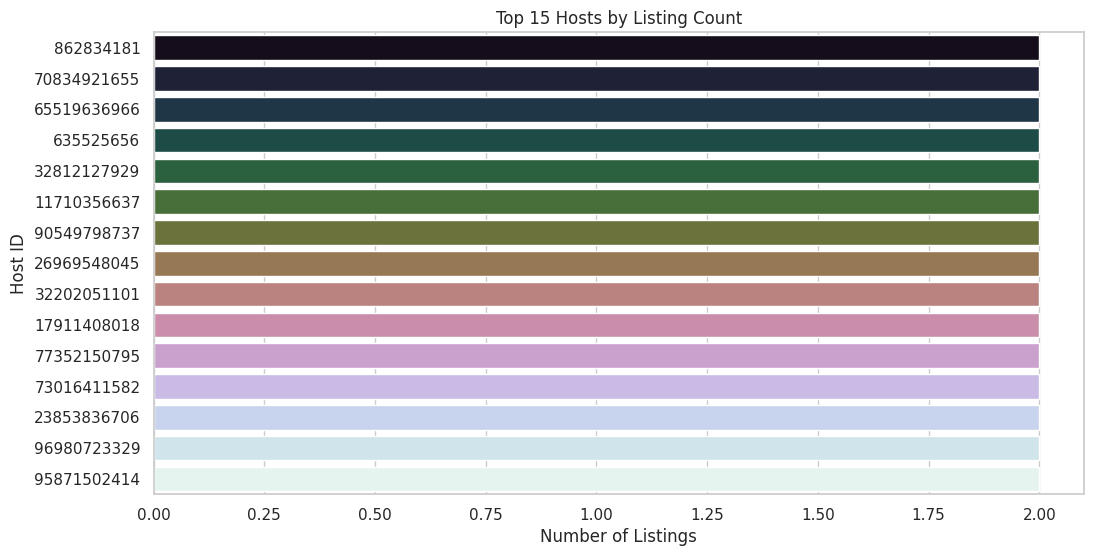

In [125]:
# =============================
# Question 24: Top 15 Hosts by Listing Count
# =============================

# Count listings per host
top_hosts = df_airbnb['host_id'].value_counts().head(15)

# Plot horizontal bar chart
plt.figure(figsize=(12,6))

sns.barplot(
    x=top_hosts.values,
    y=top_hosts.index.astype(str),   # Convert host IDs to string for readability
    hue=top_hosts.index.astype(str),  # Assign hue to use palette (future-proof)
    palette='cubehelix',
    dodge=False                        # Keep single bar per host
)

plt.legend([], [], frameon=False)  # Remove redundant legend

plt.title('Top 15 Hosts by Listing Count')
plt.xlabel('Number of Listings')
plt.ylabel('Host ID')
plt.show()

### Question 25: Price by Neighborhood (Top 12 by Listings)

**Objective:**  
Examine how listing prices vary across the most popular neighborhoods.

**Approach:**  
- Identify the top 12 neighborhoods by number of listings.  
- Use a boxplot to visualize price distributions in these neighborhoods.  
- Hide outliers to focus on typical price ranges.

**Expected Insights:**  
- Determine if certain neighborhoods consistently have higher or lower prices.  
- Identify neighborhoods with wide price variation versus more uniform pricing.

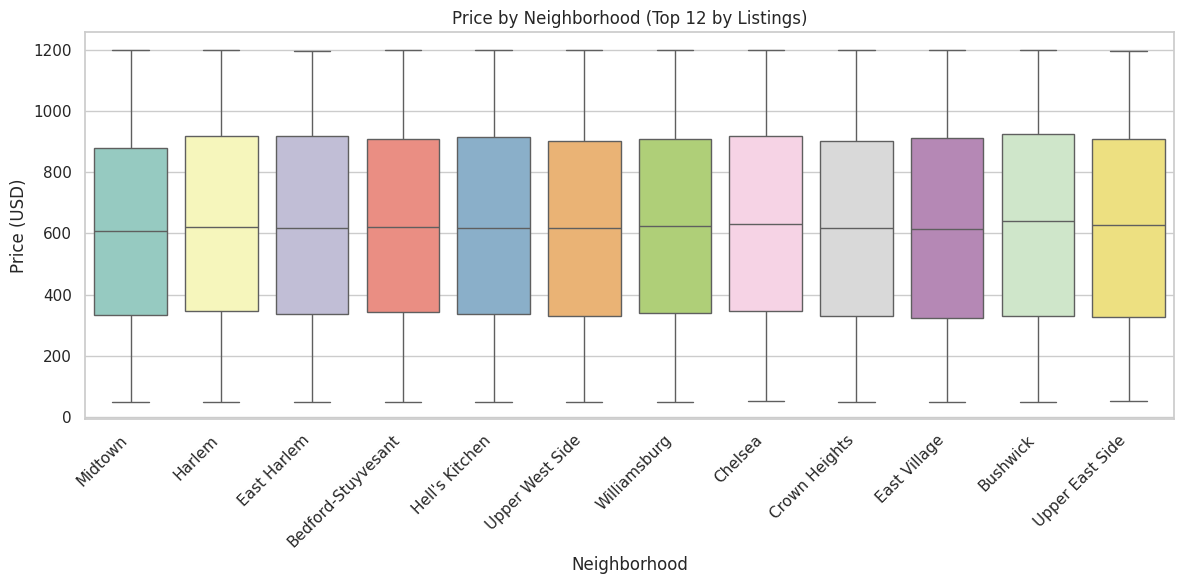

In [126]:
# =============================
# Question 25: Price by Neighborhood (Top 12 by Listings)
# =============================

# Identify top 12 neighborhoods by listing count
common_neigh = df_airbnb['neighbourhood'].value_counts().head(12).index

# Plot price distribution by neighborhood
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df_airbnb[df_airbnb['neighbourhood'].isin(common_neigh)],
    x='neighbourhood',
    y='price',
    hue=df_airbnb[df_airbnb['neighbourhood'].isin(common_neigh)]['neighbourhood'],  # Assign hue for future-proof palette
    showfliers=False,
    palette='Set3',
    dodge=False  # Keep single box per neighborhood
)

plt.title('Price by Neighborhood (Top 12 by Listings)')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.tight_layout()
plt.show()

### Question 26: Reviews Count Distribution

**Objective:**  
Analyze how many reviews listings receive and identify distribution patterns.

**Approach:**  
- Use the `number_of_reviews` column.  
- Clip extreme values at the 99th percentile to reduce skew.  
- Use a histogram to visualize the distribution of review counts.

**Expected Insights:**  
- Understand if most listings receive few or many reviews.  
- Identify outlier listings with exceptionally high reviews.

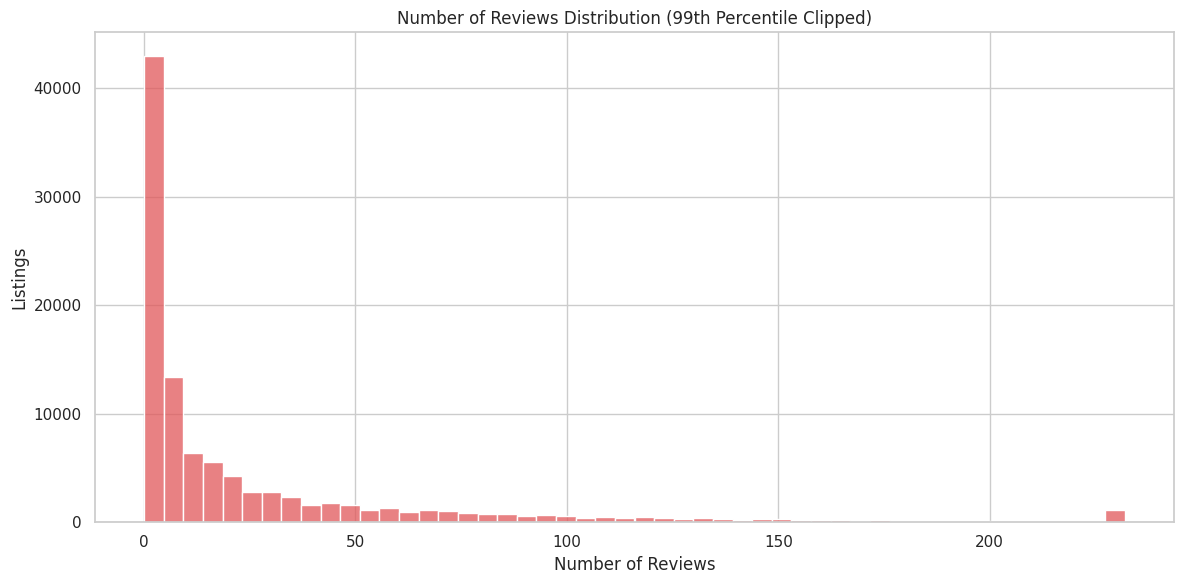

In [127]:
# =============================
# Question 26: Reviews Count Distribution
# =============================

if 'number_of_reviews' in df_airbnb.columns:
    rv = df_airbnb['number_of_reviews'].fillna(0)
    clip_rv = np.nanpercentile(rv, 99)  # clip extreme outliers

    plt.figure(figsize=(12,6))
    sns.histplot(
        rv.clip(upper=clip_rv),
        bins=50,
        color='#E15759',
        kde=False
    )
    plt.title('Number of Reviews Distribution (99th Percentile Clipped)')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Listings')
    plt.tight_layout()
    plt.show()

### Question 27: Last Review Recency by Year

**Objective:**  
Understand when listings were last reviewed to analyze recency and engagement.

**Approach:**  
- Extract the year from the `last_review` column.  
- Use a count plot to visualize how many listings had their last review in each year.  
- Handle missing or invalid dates gracefully.

**Expected Insights:**  
- Identify trends in guest engagement over time.  
- Detect if certain years saw a surge in reviews or dormancy in listings.

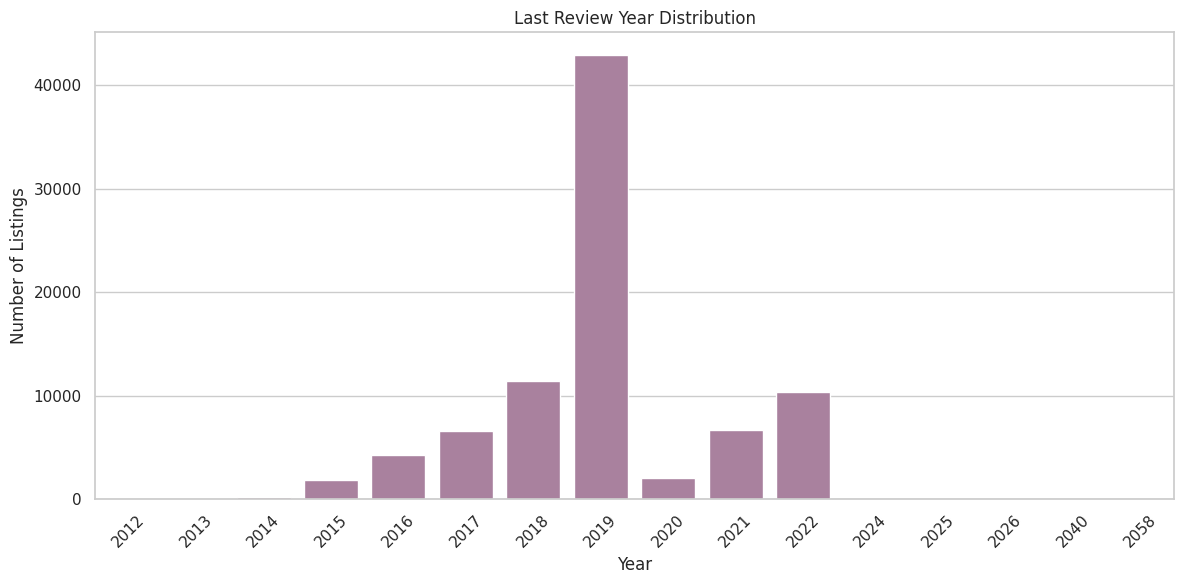

In [128]:
# =============================
# Question 27: Last Review Recency by Year
# =============================

if 'last_review' in df_airbnb.columns:
    yr = pd.to_datetime(df_airbnb['last_review'], errors='coerce').dt.year

    plt.figure(figsize=(12,6))
    sns.countplot(
        x=yr.dropna().astype(int),
        color='#B07AA1'
    )
    plt.title('Last Review Year Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Question 28: Room Type Mix by Borough

**Objective:**  
Analyze the distribution of different room types across boroughs to understand the market composition.

**Approach:**  
- Group data by `neighbourhood_group` and `room_type`.  
- Calculate the share of each room type within each borough.  
- Use a colorful grouped bar plot to show proportions clearly.

**Expected Insights:**  
- Identify which boroughs favor entire homes, private rooms, or shared rooms.  
- Understand market composition and guest preferences visually.

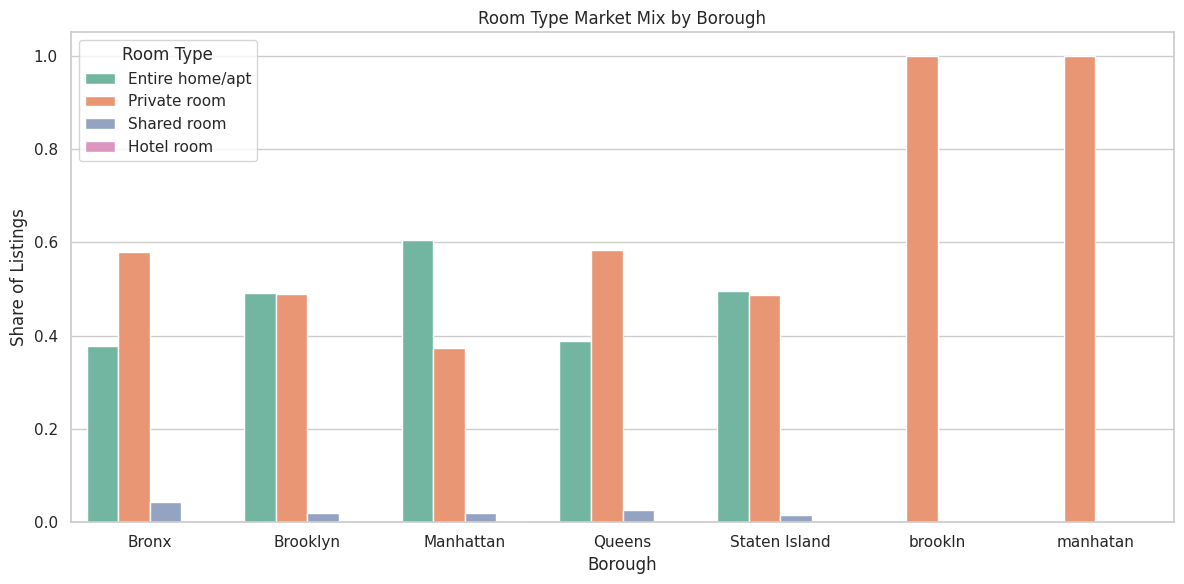

In [129]:
# =============================
# Question 28: Room Type Mix by Borough
# =============================

if {'neighbourhood_group', 'room_type'}.issubset(df_airbnb.columns):
    # Group and calculate share safely
    mix_counts = df_airbnb.groupby(['neighbourhood_group', 'room_type'], observed=True)\
                          .size().reset_index(name='count')
    mix_counts['share'] = mix_counts.groupby('neighbourhood_group', observed=True)['count']\
                                    .transform(lambda s: s / s.sum())  # observed=True fixes future pandas warning

    plt.figure(figsize=(12,6))

    # Barplot showing room type share by borough
    sns.barplot(
        data=mix_counts,
        x='neighbourhood_group',
        y='share',
        hue='room_type',
        palette='Set2'
    )

    plt.title('Room Type Market Mix by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Share of Listings')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()

### Question 29 : Price by Availability Buckets

**Objective:**  
Analyze how listing prices vary depending on the number of days per year a property is available.

**Approach:**  
- Bucket the `availability_365` column into ranges: `0-30`, `31-90`, `91-180`, `181-365`.  
- Use a boxplot to visualize price distributions per availability bucket.  
- Hide outliers for clarity.

**Expected Insights:**  
- Determine if listings available year-round are priced differently from limited-availability listings.  
- Understand seasonal vs full-year pricing patterns.


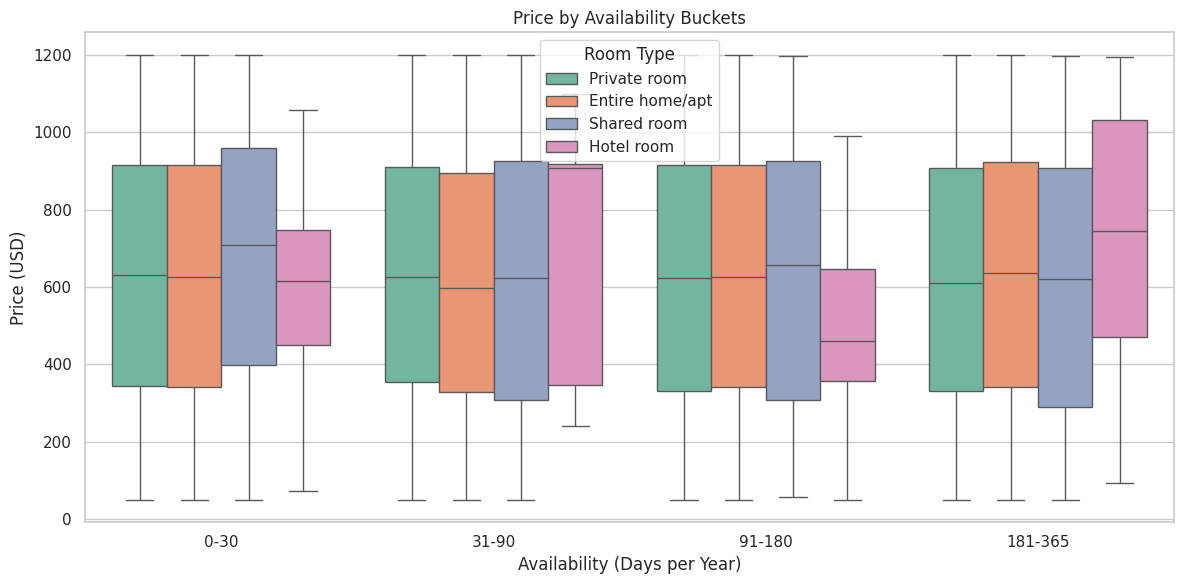

In [130]:
# =============================
# Question 29 : Price by Availability Buckets
# =============================

if 'availability_365' in df_airbnb.columns:
    df_avail = df_airbnb[['availability_365','price','room_type']].dropna()

    # Create availability buckets
    bins = [0,30,90,180,365]
    labels = ['0-30','31-90','91-180','181-365']
    df_avail['avail_bucket'] = pd.cut(df_avail['availability_365'], bins=bins, labels=labels, include_lowest=True)

    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=df_avail,
        x='avail_bucket',
        y='price',
        hue='room_type',
        showfliers=False,
        palette='Set2'
    )
    plt.title('Price by Availability Buckets')
    plt.xlabel('Availability (Days per Year)')
    plt.ylabel('Price (USD)')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()


### Question 30: Minimum Nights Policy Mix by Borough

**Objective:**  
Analyze the distribution of minimum night requirements across boroughs to understand hosting policies.

**Approach:**  
- Bucket the `minimum_nights` column into ranges: `1-3`, `4-7`, `8-14`, `15-30`, `31+`.  
- Calculate the share of listings in each bucket per borough.  
- Use a colorful grouped bar plot to visualize the policy mix.

**Expected Insights:**  
- Identify how strict or flexible minimum night policies are across boroughs.  
- Understand the market composition for short-term vs long-term stays.

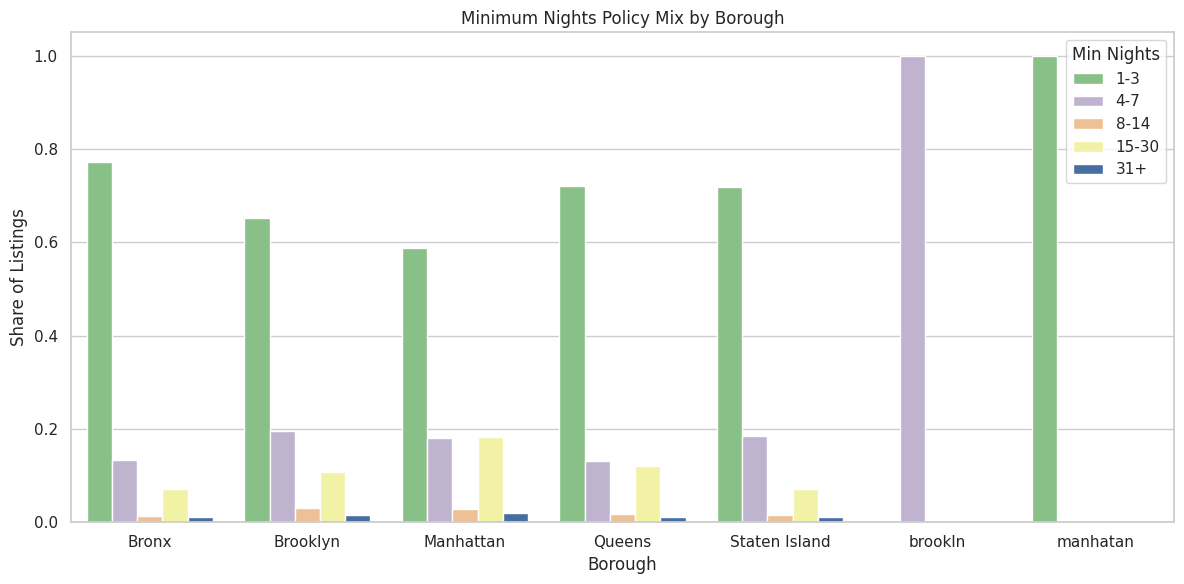

In [131]:
# =============================
# Question 30: Minimum Nights Policy Mix by Borough
# =============================

if 'minimum_nights' in df_airbnb.columns and 'neighbourhood_group' in df_airbnb.columns:
    df_mn = df_airbnb[['neighbourhood_group','minimum_nights']].dropna()

    # Create minimum nights buckets
    bins_mn = [1,3,7,14,30,9999]
    labels_mn = ['1-3','4-7','8-14','15-30','31+']
    df_mn['min_nights_bucket'] = pd.cut(
        df_mn['minimum_nights'],
        bins=bins_mn,
        labels=labels_mn,
        include_lowest=True,
        right=True
    )

    # Calculate share of each bucket per borough
    mix_mn = df_mn.groupby(['neighbourhood_group','min_nights_bucket'], observed=True)\
                   .size().reset_index(name='n')  # observed=True fixes pandas warning
    mix_mn['share'] = mix_mn.groupby('neighbourhood_group', observed=True)['n']\
                             .transform(lambda s: s / s.sum())  # observed=True fixes pandas warning

    # Plot grouped bar chart
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=mix_mn,
        x='neighbourhood_group',
        y='share',
        hue='min_nights_bucket',
        palette='Accent'
    )
    plt.title('Minimum Nights Policy Mix by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Share of Listings')
    plt.legend(title='Min Nights')
    plt.tight_layout()
    plt.show()

### Question 31: Geographic Hexbin of Average Price

**Objective:**  
Visualize spatial patterns of Airbnb prices across the city.

**Approach:**  
- Use `latitude` and `longitude` columns to map listings geographically.  
- Use `price` as the color intensity in a hexbin plot.  
- Aggregates average price per hexagonal area, reducing clutter and highlighting hotspots.

**Expected Insights:**  
- Identify high-priced and low-priced areas in the city.  
- Understand geographic concentration of expensive vs affordable listings.

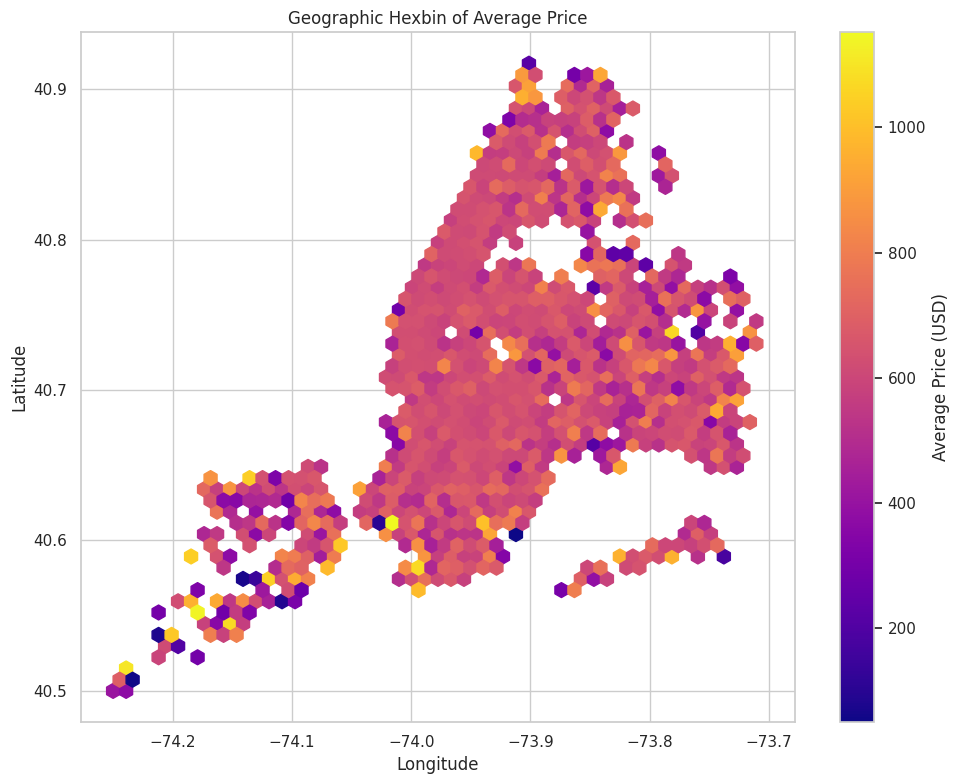

In [132]:
# =============================
# Question 31: Geographic Hexbin of Average Price
# =============================

if {'lat','long','price'}.issubset(df_airbnb.columns):
    df_geo = df_airbnb[['lat','long','price']].dropna()

    plt.figure(figsize=(10,8))
    hb = plt.hexbin(
        df_geo['long'],
        df_geo['lat'],
        C=df_geo['price'],
        gridsize=50,
        reduce_C_function=np.mean,
        cmap='plasma',
        mincnt=1
    )
    plt.colorbar(hb, label='Average Price (USD)')
    plt.title('Geographic Hexbin of Average Price')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

### Question 32: Summary Statistics Export

**Objective:**  
Generate a compact summary of key numeric metrics in the Airbnb dataset.

**Approach:**  
- Calculate count, mean, median, and 90th percentile for selected numeric columns: `price`, `minimum_nights`, `availability_365`, `reviews_per_month`, `number_of_reviews`.  
- Export the summary to a CSV file for further reporting or dashboard integration.

**Expected Insights:**  
- Quickly understand central tendencies and ranges of important metrics.  
- Create a reusable summary for dashboards or presentations.

In [133]:
# =============================
# Question 32: Summary Statistics Export
# =============================

summary = {}
numeric_cols = ['price','minimum_nights','availability_365','reviews_per_month','number_of_reviews']

for col in numeric_cols:
    if col in df_airbnb.columns:
        s = df_airbnb[col].dropna()
        summary[col + '_count'] = s.shape[0]
        summary[col + '_mean'] = float(s.mean())
        summary[col + '_median'] = float(s.median())
        summary[col + '_p90'] = float(s.quantile(0.9))

# Convert summary dict to DataFrame and export
summary_df = pd.DataFrame([summary])
summary_df.to_csv('airbnb_summary_stats.csv', index=False)

print("Summary statistics exported to 'airbnb_summary_stats.csv'.")
display(summary_df)

Summary statistics exported to 'airbnb_summary_stats.csv'.


price_count  price_mean  price_median  price_p90  minimum_nights_count  \
0       102352  625.293536         624.0     1085.0                102190   

   minimum_nights_mean  minimum_nights_median  minimum_nights_p90  \
0             8.135845                    3.0                30.0   

   availability_365_count  availability_365_mean  availability_365_median  \
0                  102151             141.133254                     96.0   

   availability_365_p90  reviews_per_month_count  reviews_per_month_mean  \
0                 350.0                    86720                1.374022   

   reviews_per_month_median  reviews_per_month_p90  number_of_reviews_count  \
0                      0.74                   3.54                   102416   

   number_of_reviews_mean  number_of_reviews_median  number_of_reviews_p90  
0               27.483743                       7.0                   81.5

### Question 33 : Host Listing Count Distribution

**Objective:**  
Show the distribution of the number of listings per host, even if no host has 3+ listings.

**Approach:**  
- Count the number of listings per `host_id`.  
- Display the **top 15 hosts** by listing count using a colorful bar plot.  
- Understand host concentration in the dataset.

**Expected Insights:**  
- Identify the most active hosts in terms of listing count.  
- Understand whether listings are concentrated among few hosts or evenly distributed.


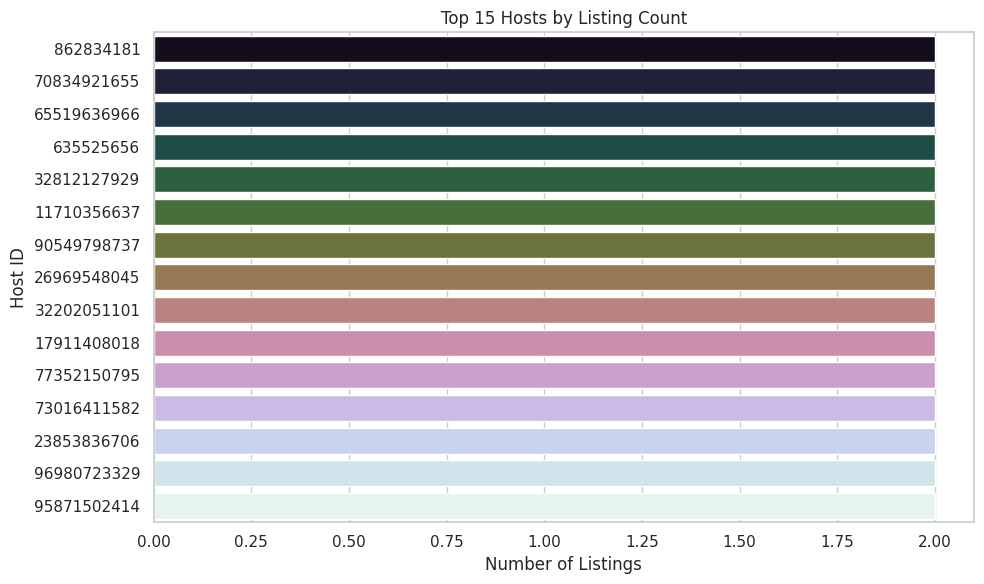

Top 15 hosts by number of listings displayed.


In [134]:
# =============================
# Alternative Question 33: Host Listing Count Distribution
# =============================

if 'host_id' in df_airbnb.columns:
    host_counts = df_airbnb['host_id'].value_counts()

    plt.figure(figsize=(10,6))

    sns.barplot(
        x=host_counts.head(15).values,
        y=host_counts.head(15).index.astype(str),
        hue=host_counts.head(15).index.astype(str),  # Assign hue for future-proof palette
        palette='cubehelix',
        dodge=False                                 # Keep single bar per host
    )

    plt.legend([], [], frameon=False)  # Remove redundant legend

    plt.title('Top 15 Hosts by Listing Count')
    plt.xlabel('Number of Listings')
    plt.ylabel('Host ID')
    plt.tight_layout()
    plt.show()

    print("Top 15 hosts by number of listings displayed.")

### Question 34: Price by Room Type and Borough

**Objective:**  
Examine how listing prices vary by room type across different boroughs.

**Approach:**  
- Use `price`, `room_type`, and `neighbourhood_group` columns.  
- Create a **grouped boxplot** to show price distribution by room type within each borough.  
- Hide outliers to focus on typical price ranges.

**Expected Insights:**  
- Identify which room types are priced higher within each borough.  
- Understand borough-level price trends across room types.

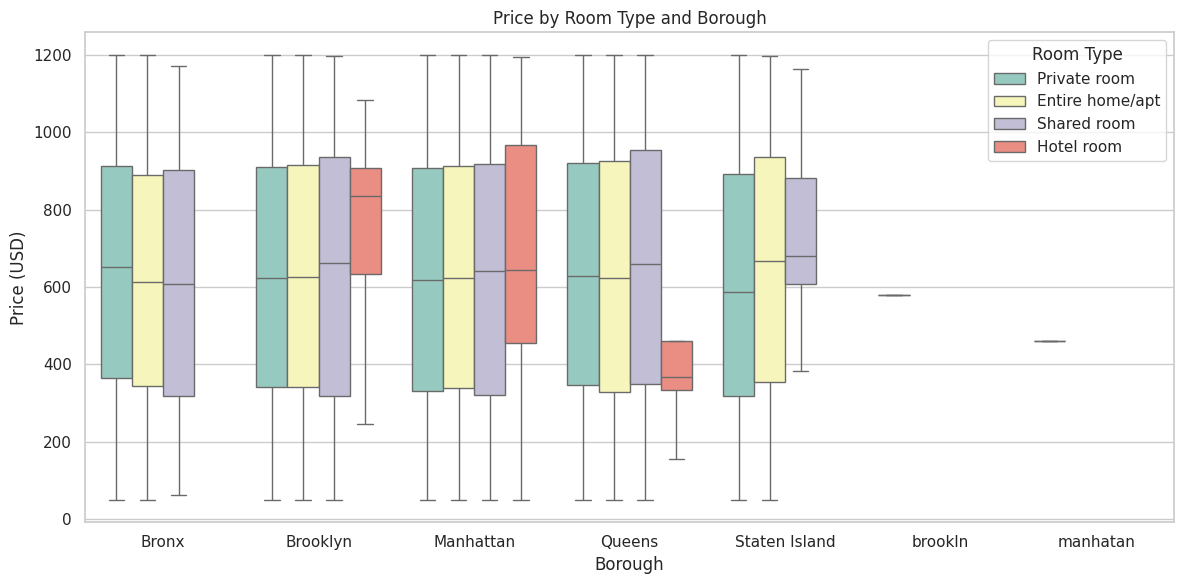

In [135]:
# =============================
# Question 34: Price by Room Type and Borough
# =============================

if {'price','room_type','neighbourhood_group'}.issubset(df_airbnb.columns):
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=df_airbnb,
        x='neighbourhood_group',
        y='price',
        hue='room_type',
        showfliers=False,
        palette='Set3'
    )
    plt.title('Price by Room Type and Borough')
    plt.xlabel('Borough')
    plt.ylabel('Price (USD)')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()

### Question 35: Top 15 Neighbourhoods by Average Price

**Objective:**  
Identify the most expensive neighbourhoods on average in the Airbnb dataset.

**Approach:**  
- Group listings by `neighbourhood` and calculate the **average price**.  
- Select the **top 15 neighbourhoods** by average price.  
- Visualize using a **horizontal bar plot** for clarity and color appeal.

**Expected Insights:**  
- Pinpoint high-priced neighbourhoods for premium listings.  
- Understand spatial pricing trends across the city.

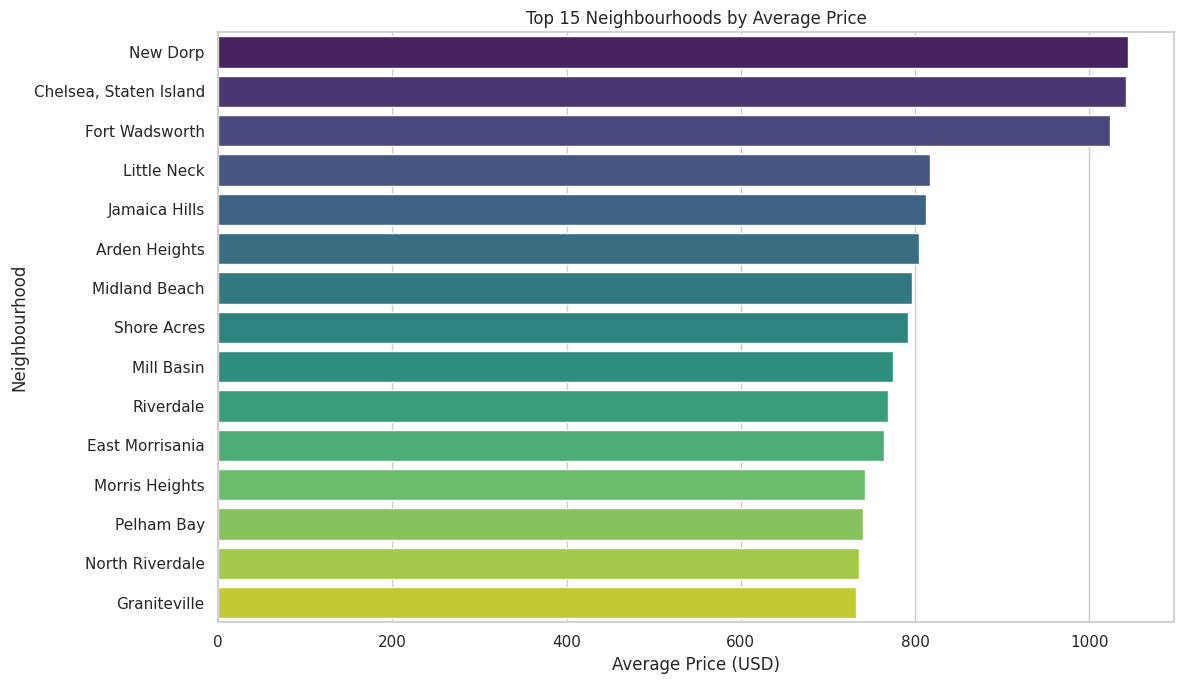

In [136]:
# =============================
# Question 35: Top 15 Neighbourhoods by Average Price
# =============================

if {'neighbourhood','price'}.issubset(df_airbnb.columns):
    avg_price_neigh = df_airbnb.groupby('neighbourhood')['price']\
                               .mean().sort_values(ascending=False).head(15)

    plt.figure(figsize=(12,7))

    sns.barplot(
        x=avg_price_neigh.values,
        y=avg_price_neigh.index,
        hue=avg_price_neigh.index,  # Assign hue for future-proof palette
        palette='viridis',
        dodge=False                 # Keep single bar per neighborhood
    )

    plt.legend([], [], frameon=False)  # Remove redundant legend

    plt.title('Top 15 Neighbourhoods by Average Price')
    plt.xlabel('Average Price (USD)')
    plt.ylabel('Neighbourhood')
    plt.tight_layout()
    plt.show()

### Question 36: Room Type Distribution by Neighbourhood

**Objective:**  
Analyze the distribution of room types across different neighbourhoods to understand the supply composition.

**Approach:**  
- Group by `neighbourhood` and `room_type`.  
- Calculate the share of each room type within each neighbourhood.  
- Use a **stacked bar plot** to visualize proportions, making it colorful and easy to compare.

**Expected Insights:**  
- Identify neighbourhoods dominated by specific room types (Entire home/apartment, Private room, etc.).  
- Understand the mix of accommodation types across the city.

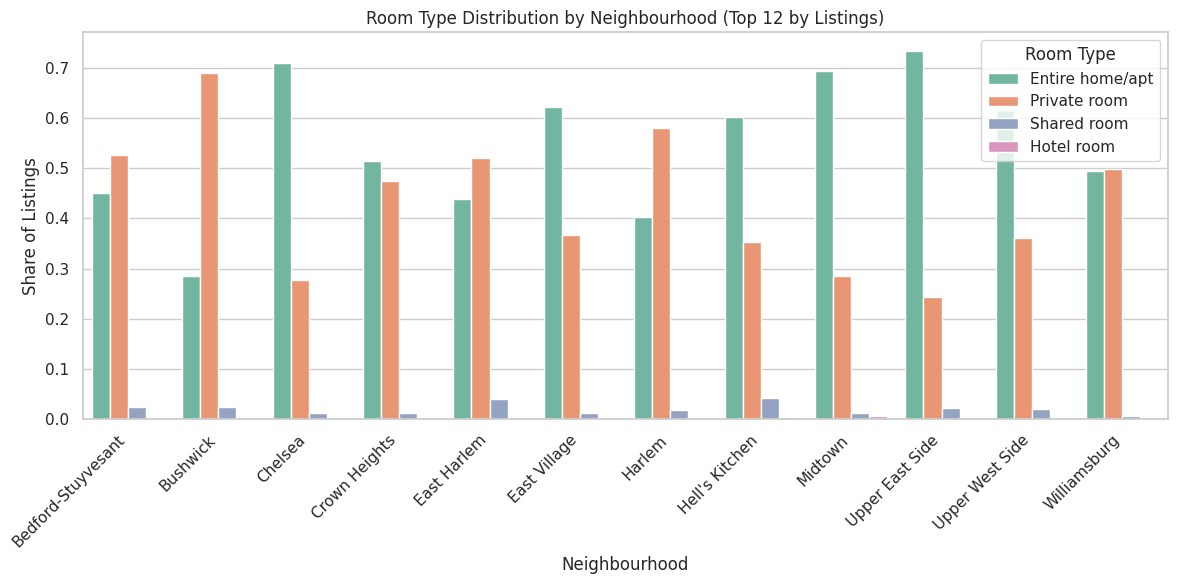

In [137]:
# =============================
# Question 36: Room Type Distribution by Neighbourhood
# =============================

if {'neighbourhood','room_type'}.issubset(df_airbnb.columns):
    # Compute share of room types per neighbourhood
    room_mix = df_airbnb.groupby(['neighbourhood','room_type']).size().reset_index(name='count')
    room_mix['share'] = room_mix.groupby('neighbourhood')['count'].transform(lambda x: x / x.sum())

    # Focus on top 12 neighbourhoods by number of listings
    top_neigh = df_airbnb['neighbourhood'].value_counts().head(12).index
    room_mix_top = room_mix[room_mix['neighbourhood'].isin(top_neigh)]

    plt.figure(figsize=(12,6))
    sns.barplot(
        data=room_mix_top,
        x='neighbourhood',
        y='share',
        hue='room_type',
        palette='Set2'
    )
    plt.title('Room Type Distribution by Neighbourhood (Top 12 by Listings)')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Share of Listings')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()


### Question 37: Review Count Distribution

**Objective:**  
Understand the distribution of the number of reviews across listings.

**Approach:**  
- Use the `number_of_reviews` column.  
- Clip extreme values to the 99th percentile to reduce skew.  
- Visualize the distribution using a **histogram with KDE** for a smooth, colorful view.

**Expected Insights:**  
- Identify listings with very few or very many reviews.  
- Understand the overall engagement and popularity of listings.

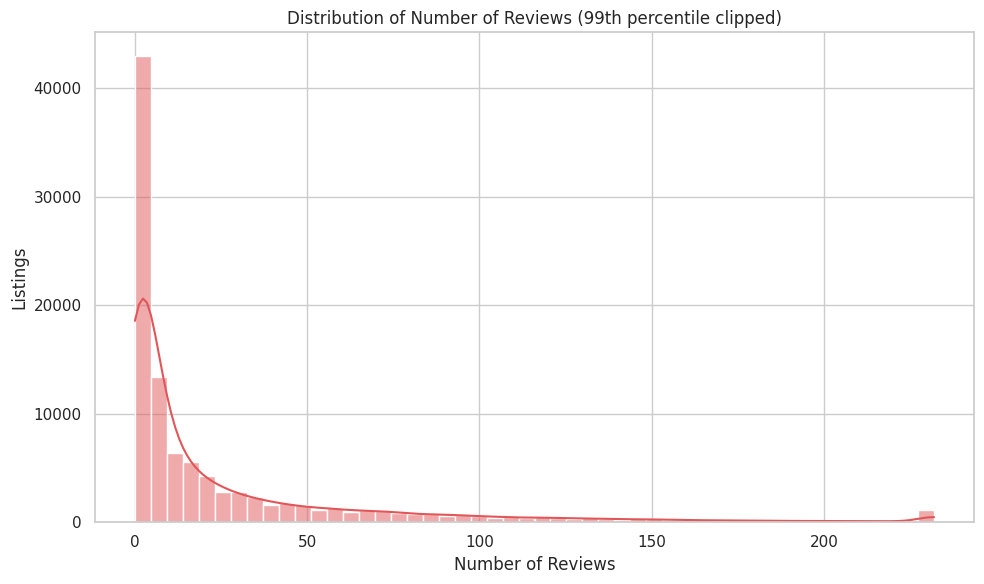

Displayed the distribution of number of reviews.


In [138]:
# =============================
# Question 37: Review Count Distribution
# =============================

if 'number_of_reviews' in df_airbnb.columns:
    reviews = df_airbnb['number_of_reviews'].fillna(0)
    clip_val = np.nanpercentile(reviews, 99)
    reviews_clip = reviews.clip(upper=clip_val)

    plt.figure(figsize=(10,6))
    sns.histplot(reviews_clip, bins=50, kde=True, color='#E15759')
    plt.title('Distribution of Number of Reviews (99th percentile clipped)')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Listings')
    plt.tight_layout()
    plt.show()

    print('Displayed the distribution of number of reviews.')

### Question 38: Reviews per Month vs Price

**Objective:**  
Examine the relationship between listing price and guest activity (reviews per month).

**Approach:**  
- Use `reviews_per_month` and `price` columns.  
- Sample data if needed to avoid overcrowding in scatterplot.  
- Color points by `room_type` to make it more informative.  
- Use transparency (`alpha`) for better visibility of dense regions.

**Expected Insights:**  
- Determine if higher-priced listings tend to receive fewer or more reviews.  
- Identify popular room types at different price points.

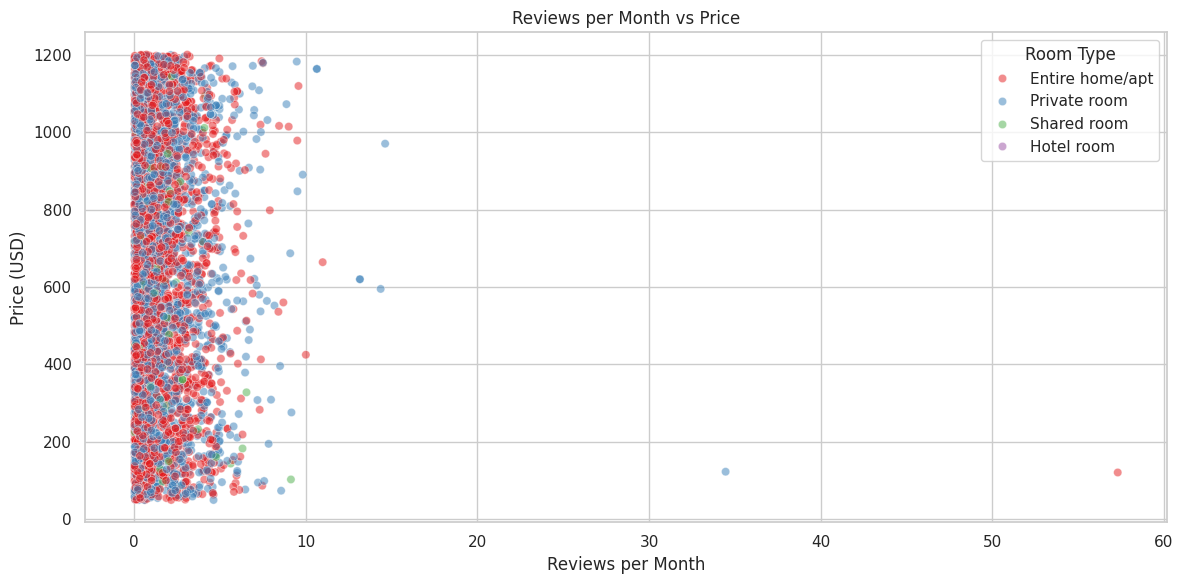

Plotted Reviews per Month vs Price scatterplot.


In [139]:
# =============================
# Question 38: Reviews per Month vs Price
# =============================

if {'reviews_per_month','price','room_type'}.issubset(df_airbnb.columns):
    # Sample up to 5000 rows for plotting
    sample_df = df_airbnb[['reviews_per_month','price','room_type']].dropna().sample(min(5000, len(df_airbnb)), random_state=42)

    plt.figure(figsize=(12,6))
    sns.scatterplot(
        data=sample_df,
        x='reviews_per_month',
        y='price',
        hue='room_type',
        alpha=0.5,
        palette='Set1'
    )
    plt.title('Reviews per Month vs Price')
    plt.xlabel('Reviews per Month')
    plt.ylabel('Price (USD)')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()

    print('Plotted Reviews per Month vs Price scatterplot.')

### Question 39: Availability vs Price by Room Type

**Objective:**  
Analyze how availability throughout the year relates to listing prices, broken down by room type.

**Approach:**  
- Use `availability_365` and `price` columns.  
- Plot a scatterplot, color-coded by `room_type`.  
- Sample data to prevent overcrowding in the plot.  

**Expected Insights:**  
- Determine if highly available listings have different pricing patterns.  
- Identify which room types maintain higher availability at varying prices.

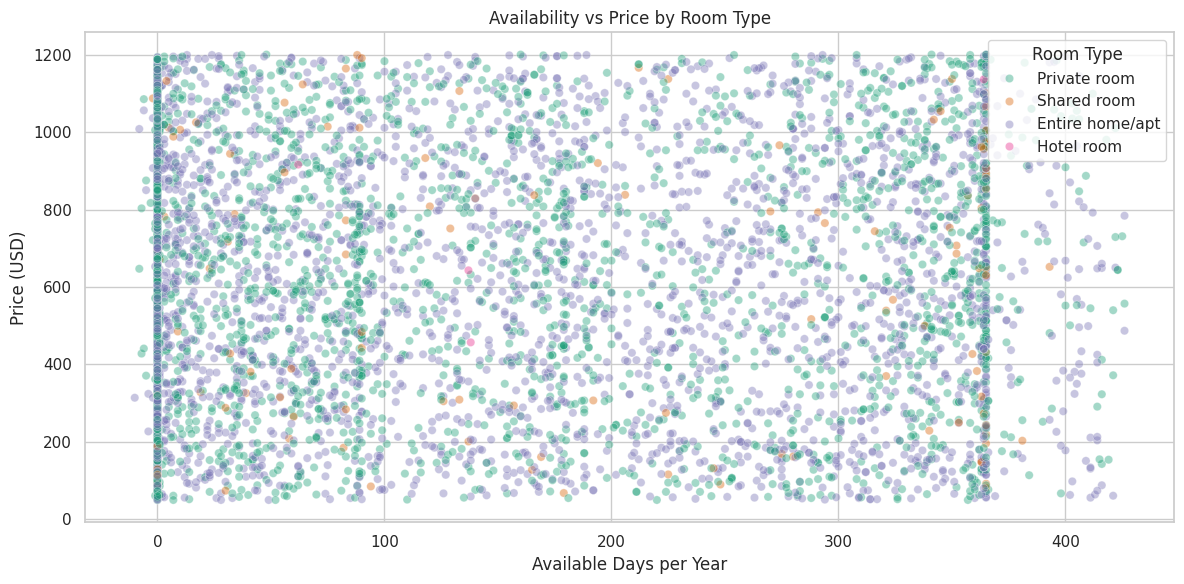

Plotted Availability vs Price by Room Type.


In [140]:
# =============================
# Question 39: Availability vs Price by Room Type
# =============================

if {'availability_365','price','room_type'}.issubset(df_airbnb.columns):
    # Sample data for clarity
    sample_df = df_airbnb[['availability_365','price','room_type']].dropna().sample(min(6000, len(df_airbnb)), random_state=1)

    plt.figure(figsize=(12,6))
    sns.scatterplot(
        data=sample_df,
        x='availability_365',
        y='price',
        hue='room_type',
        alpha=0.4,
        palette='Dark2'
    )
    plt.title('Availability vs Price by Room Type')
    plt.xlabel('Available Days per Year')
    plt.ylabel('Price (USD)')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()

    print('Plotted Availability vs Price by Room Type.')

### Question 40: Compact Summary Dashboard

**Objective:**  
Provide a single dashboard summarizing the most important Airbnb insights, combining price, availability, reviews, room types, and top neighbourhoods.

**Approach:**  
- Select 4–6 key visuals from the previous analysis.  
- Arrange them in a grid layout using Matplotlib’s `subplots`.  
- Include colorful, readable charts with consistent styling.  

**Expected Insights:**  
- Quick glance at price distribution, top neighbourhoods, room type mix, and review activity.  
- Serve as a visual executive summary for stakeholders.

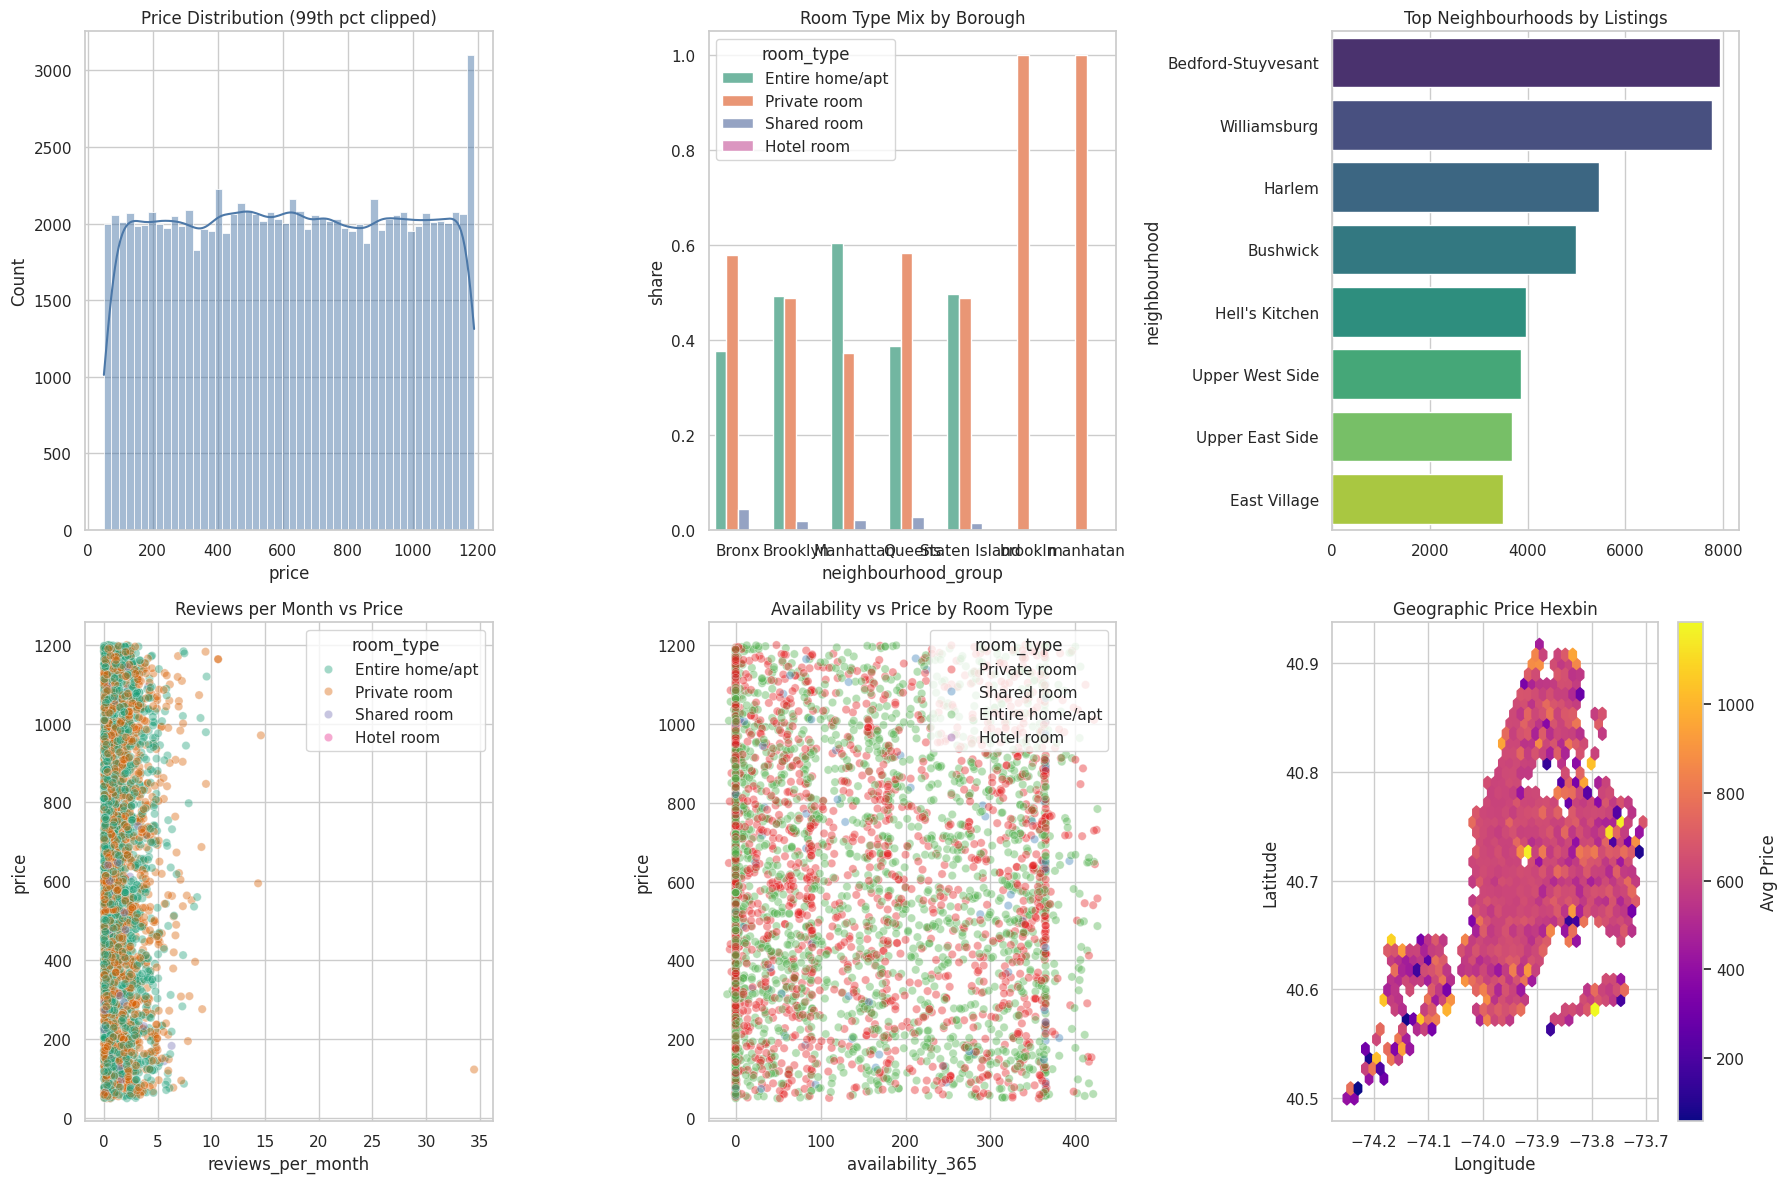

Displayed compact summary dashboard for Airbnb dataset.


In [141]:
# =============================
# Question 40: Compact Summary Dashboard
# =============================

import matplotlib.gridspec as gridspec

# Sample data preparation
top_neigh = df_airbnb['neighbourhood'].value_counts().head(8).index
df_top = df_airbnb[df_airbnb['neighbourhood'].isin(top_neigh)]

# Set up a 2x3 grid
fig = plt.figure(figsize=(18,12))
gs = gridspec.GridSpec(2, 3, figure=fig)

# ---- Plot 1: Price Distribution ----
ax0 = fig.add_subplot(gs[0,0])
prices = df_airbnb['price'].dropna()
clip_val = np.nanpercentile(prices, 99)
sns.histplot(prices.clip(upper=clip_val), bins=50, kde=True, color='#4C78A8', ax=ax0)
ax0.set_title('Price Distribution (99th pct clipped)')

# ---- Plot 2: Room Type Mix by Borough ----
ax1 = fig.add_subplot(gs[0,1])
mix_counts = df_airbnb.groupby(['neighbourhood_group','room_type'], observed=True).size().reset_index(name='n')
mix_counts['share'] = mix_counts.groupby('neighbourhood_group', observed=True)['n'].transform(lambda s: s/s.sum())
sns.barplot(
    data=mix_counts,
    x='neighbourhood_group',
    y='share',
    hue='room_type',
    palette='Set2',
    ax=ax1
)
ax1.set_title('Room Type Mix by Borough')

# ---- Plot 3: Top Neighbourhoods by Listings ----
ax2 = fig.add_subplot(gs[0,2])
neigh_counts = df_airbnb['neighbourhood'].value_counts().head(8)
sns.barplot(
    x=neigh_counts.values,
    y=neigh_counts.index,
    hue=neigh_counts.index,  # Assign hue for future-proof palette
    palette='viridis',
    dodge=False,
    ax=ax2
)
ax2.legend([], [], frameon=False)  # Remove redundant legend
ax2.set_title('Top Neighbourhoods by Listings')

# ---- Plot 4: Reviews per Month vs Price ----
ax3 = fig.add_subplot(gs[1,0])
sample_df = df_airbnb[['reviews_per_month','price','room_type']].dropna().sample(min(4000,len(df_airbnb)), random_state=42)
sns.scatterplot(data=sample_df, x='reviews_per_month', y='price', hue='room_type', alpha=0.4, palette='Dark2', ax=ax3)
ax3.set_title('Reviews per Month vs Price')

# ---- Plot 5: Availability vs Price ----
ax4 = fig.add_subplot(gs[1,1])
sample_df2 = df_airbnb[['availability_365','price','room_type']].dropna().sample(min(4000,len(df_airbnb)), random_state=1)
sns.scatterplot(data=sample_df2, x='availability_365', y='price', hue='room_type', alpha=0.4, palette='Set1', ax=ax4)
ax4.set_title('Availability vs Price by Room Type')

# ---- Plot 6: Geographic Hexbin of Average Price ----
ax5 = fig.add_subplot(gs[1,2])
if {'lat','long','price'}.issubset(df_airbnb.columns):
    hb = ax5.hexbin(df_airbnb['long'], df_airbnb['lat'], C=df_airbnb['price'], gridsize=40, reduce_C_function=np.mean, cmap='plasma')
    fig.colorbar(hb, ax=ax5, label='Avg Price')
    ax5.set_title('Geographic Price Hexbin')
    ax5.set_xlabel('Longitude')
    ax5.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

print('Displayed compact summary dashboard for Airbnb dataset.')

###Exportable Airbnb Dashboard

**Objective:**  
Create a professional, compact, and visually appealing Airbnb dashboard combining key metrics and insights in a single figure. The dashboard will be **exported as a high-resolution PNG** for reports or presentations.

**Sections Included in the Dashboard:**

1. **Key Metrics Table:**  
   Displays total listings, average price, median price, total hosts, and top 5 neighbourhoods by listings.

2. **Price Distribution:**  
   Histogram of listing prices (clipped at 99th percentile) to understand pricing trends and outliers.

3. **Room Type Mix by Borough:**  
   Shows the share of different room types (Entire home/apt, Private room, etc.) in each borough.

4. **Top Neighbourhoods by Listings:**  
   Highlights the 8 most active neighbourhoods in terms of Airbnb listings.

5. **Availability vs Price by Room Type:**  
   Scatter plot showing how pricing varies with availability across different room types.

**Key Features:**

- Uses **matplotlib** and **seaborn** for colorful and clear visualizations.  
- Combines multiple plots using **GridSpec** for a professional layout.  
- Saves the complete dashboard as `Airbnb_Complete_Dashboard.png` at 300 dpi.  
- Designed for quick interpretation by stakeholders and project reviewers.


Dashboard saved as 'Airbnb_Complete_Dashboard.png' in your working directory.


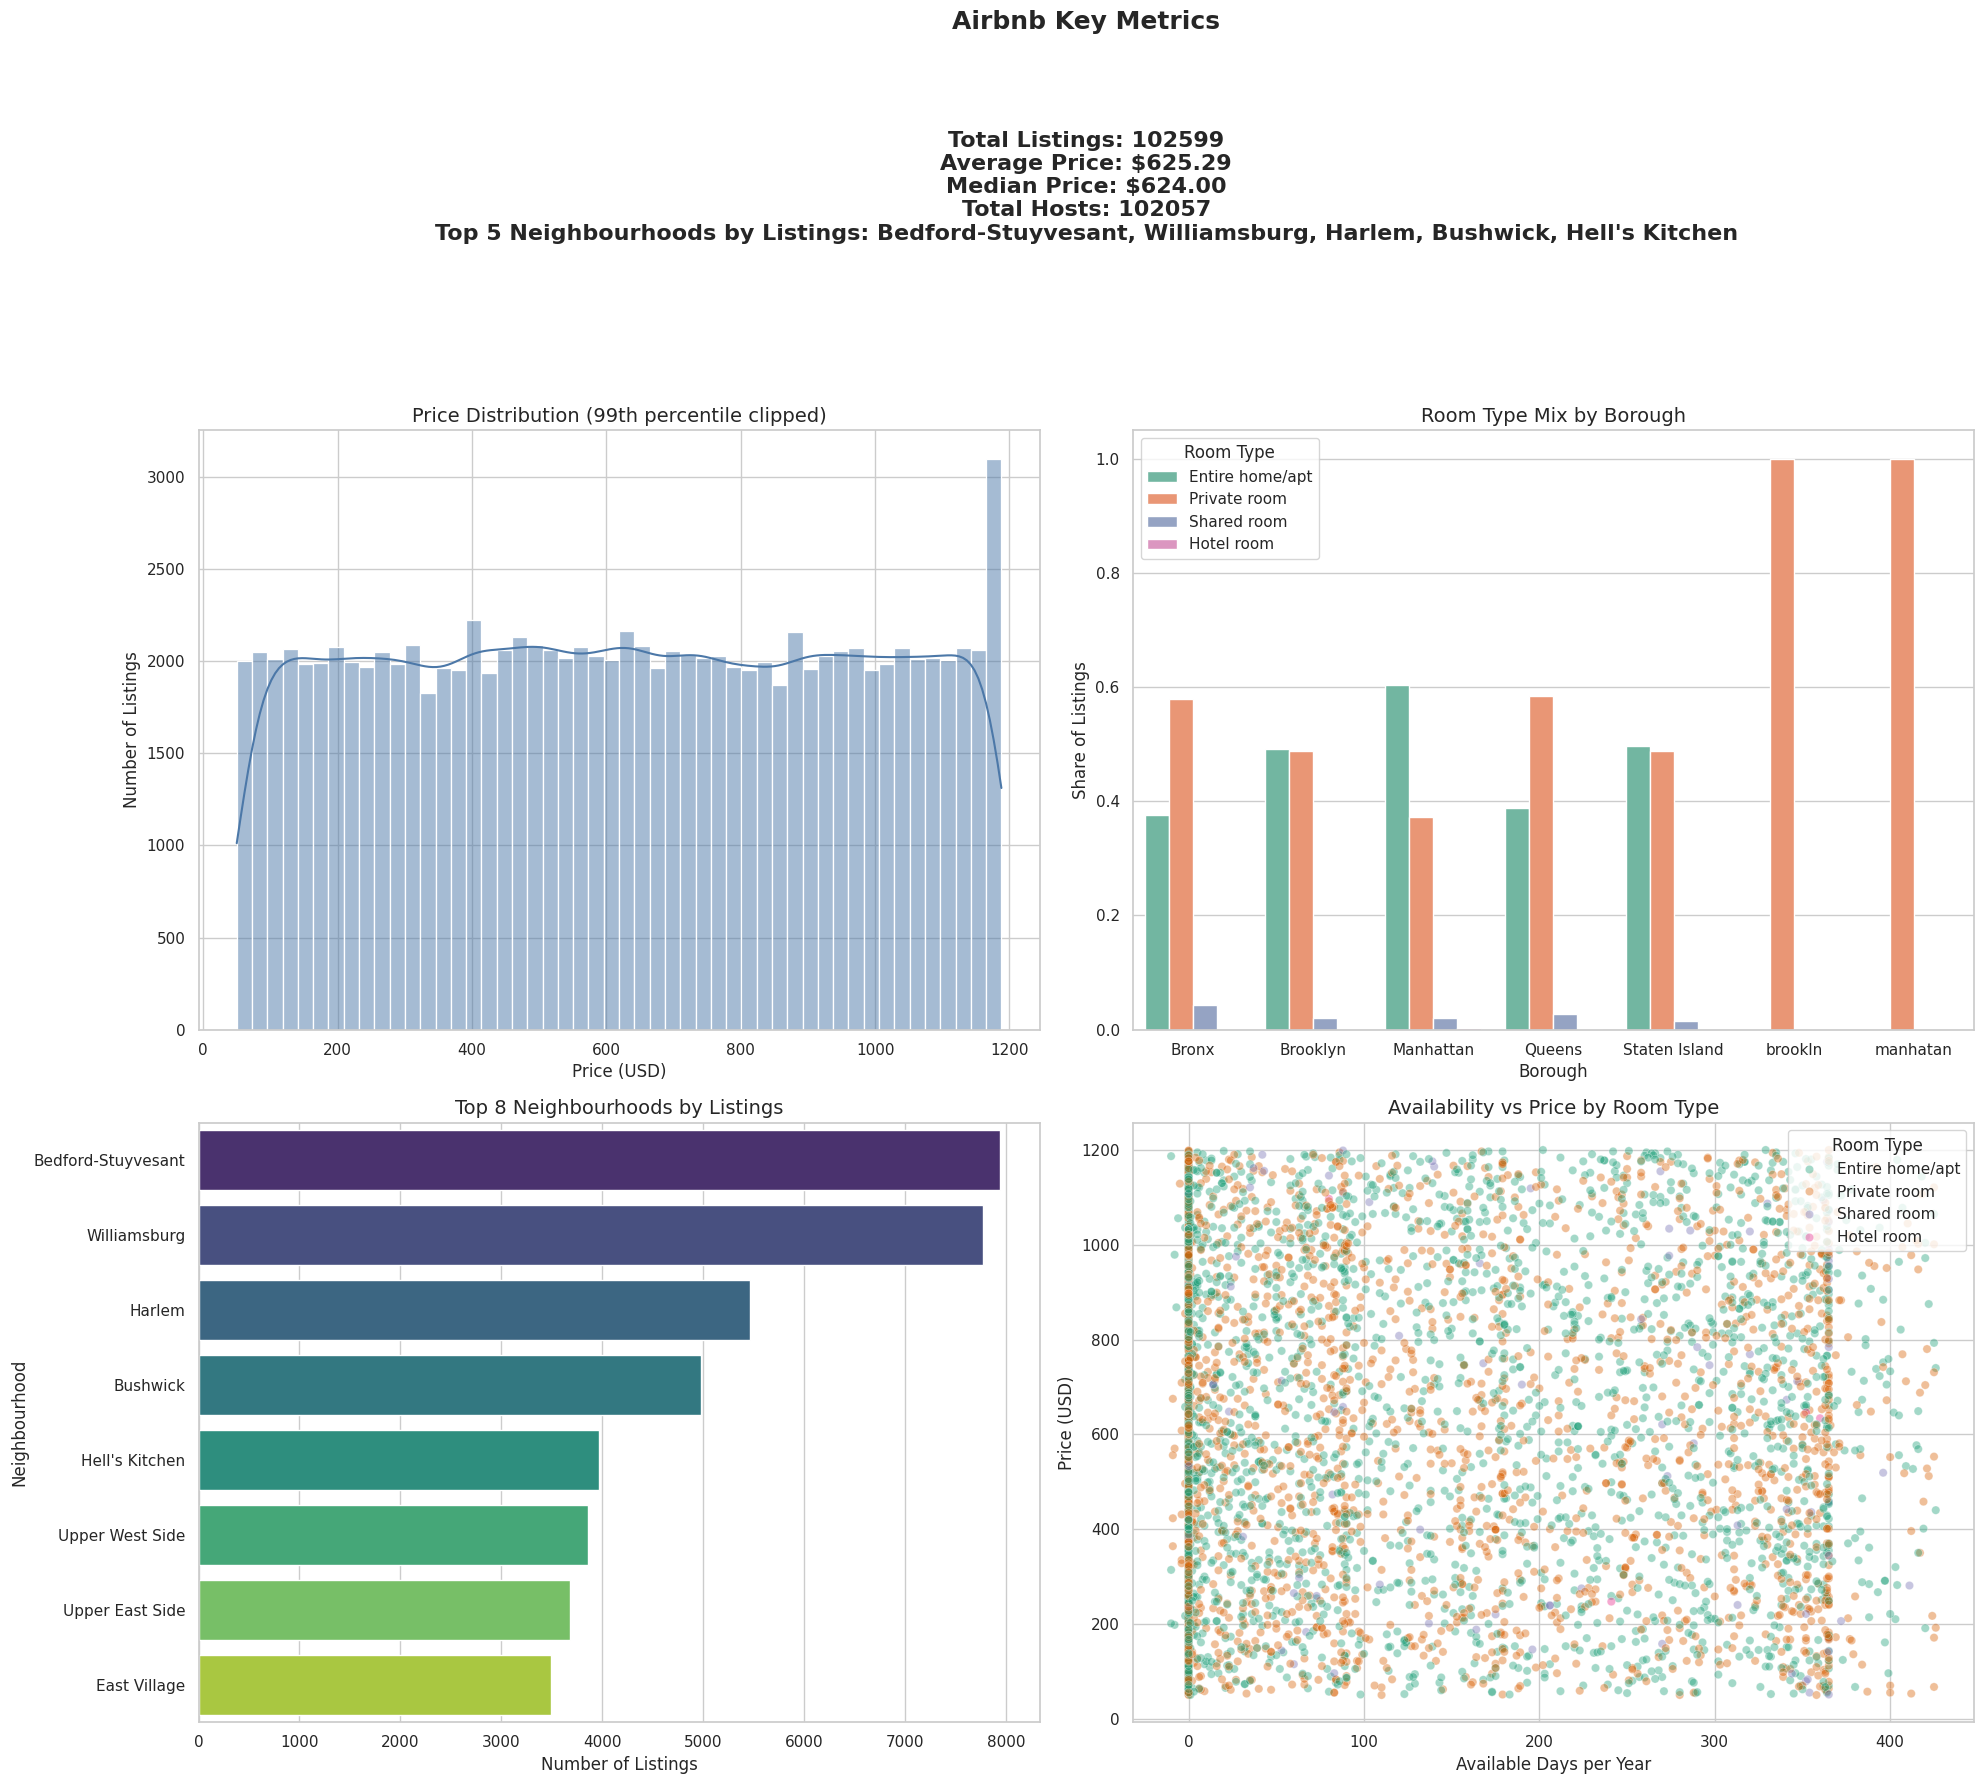

In [142]:
# =============================
# Final Exportable Airbnb Dashboard
# =============================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

sns.set(style='whitegrid')
df = df_airbnb.copy()

# ---- Prepare key metrics ----
total_listings = len(df)
avg_price = df['price'].mean()
median_price = df['price'].median()
total_hosts = df['host_id'].nunique()
top_neigh = df['neighbourhood'].value_counts().head(5)

# Create a figure for dashboard
fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[0.5, 1, 1])

# ---- Section 1: Key Metrics Table ----
ax0 = fig.add_subplot(gs[0,:])
ax0.axis('off')
metrics_text = f"""
Total Listings: {total_listings}
Average Price: ${avg_price:.2f}
Median Price: ${median_price:.2f}
Total Hosts: {total_hosts}
Top 5 Neighbourhoods by Listings: {', '.join(top_neigh.index)}
"""
ax0.text(0.5, 0.5, metrics_text, fontsize=16, ha='center', va='center', fontweight='bold', family='sans-serif')
ax0.set_title('Airbnb Key Metrics', fontsize=18, fontweight='bold')

# ---- Section 2: Price Distribution ----
ax1 = fig.add_subplot(gs[1,0])
clip_val = np.nanpercentile(df['price'], 99)
sns.histplot(df['price'].clip(upper=clip_val), bins=50, kde=True, color='#4C78A8', ax=ax1)
ax1.set_title('Price Distribution (99th percentile clipped)', fontsize=14)
ax1.set_xlabel('Price (USD)')
ax1.set_ylabel('Number of Listings')

# ---- Section 3: Room Type Mix by Borough ----
ax2 = fig.add_subplot(gs[1,1])
mix_counts = df.groupby(['neighbourhood_group','room_type'], observed=True).size().reset_index(name='n')
mix_counts['share'] = mix_counts.groupby('neighbourhood_group', observed=True)['n'].transform(lambda s: s/s.sum())
sns.barplot(
    data=mix_counts,
    x='neighbourhood_group',
    y='share',
    hue='room_type',
    palette='Set2',
    ax=ax2
)
ax2.set_title('Room Type Mix by Borough', fontsize=14)
ax2.set_ylabel('Share of Listings')
ax2.set_xlabel('Borough')
ax2.legend(title='Room Type')

# ---- Section 4: Top 8 Neighbourhoods by Listings ----
ax3 = fig.add_subplot(gs[2,0])
top_neigh = df['neighbourhood'].value_counts().head(8)
sns.barplot(
    x=top_neigh.values,
    y=top_neigh.index,
    hue=top_neigh.index,  # Assign hue for future-proof palette
    palette='viridis',
    dodge=False,
    ax=ax3
)
ax3.legend([], [], frameon=False)  # Remove redundant legend
ax3.set_title('Top 8 Neighbourhoods by Listings', fontsize=14)
ax3.set_xlabel('Number of Listings')
ax3.set_ylabel('Neighbourhood')

# ---- Section 5: Availability vs Price by Room Type ----
ax4 = fig.add_subplot(gs[2,1])
sample_df = df[['availability_365','price','room_type']].dropna().sample(min(5000,len(df)), random_state=42)
sns.scatterplot(
    data=sample_df,
    x='availability_365',
    y='price',
    hue='room_type',
    alpha=0.4,
    palette='Dark2',
    ax=ax4
)
ax4.set_title('Availability vs Price by Room Type', fontsize=14)
ax4.set_xlabel('Available Days per Year')
ax4.set_ylabel('Price (USD)')
ax4.legend(title='Room Type')

plt.tight_layout()

# ---- Export the dashboard ----
fig.savefig('Airbnb_Complete_Dashboard.png', dpi=300, bbox_inches='tight')
print("Dashboard saved as 'Airbnb_Complete_Dashboard.png' in your working directory.")

plt.show()

### Optional Enhancement 1: Price Distribution by Borough (Static for GitHub)

**Objective:**  
Show the **price distribution** of Airbnb listings for each borough, including an overall "All" view. This allows stakeholders to **compare pricing trends across boroughs** without interactive widgets.

**Instructions:**  
- The figure displays a subplot for each borough plus an overall "All" distribution.  
- Price is clipped at the 99th percentile to reduce the effect of extreme outliers.  
- Each subplot shows a histogram with a KDE overlay for better understanding of the distribution.

**Tools:**  
- `matplotlib` for plotting and subplots.  
- `seaborn` for histogram and KDE visualization.  
- `numpy` for percentile clipping.

/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1633: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


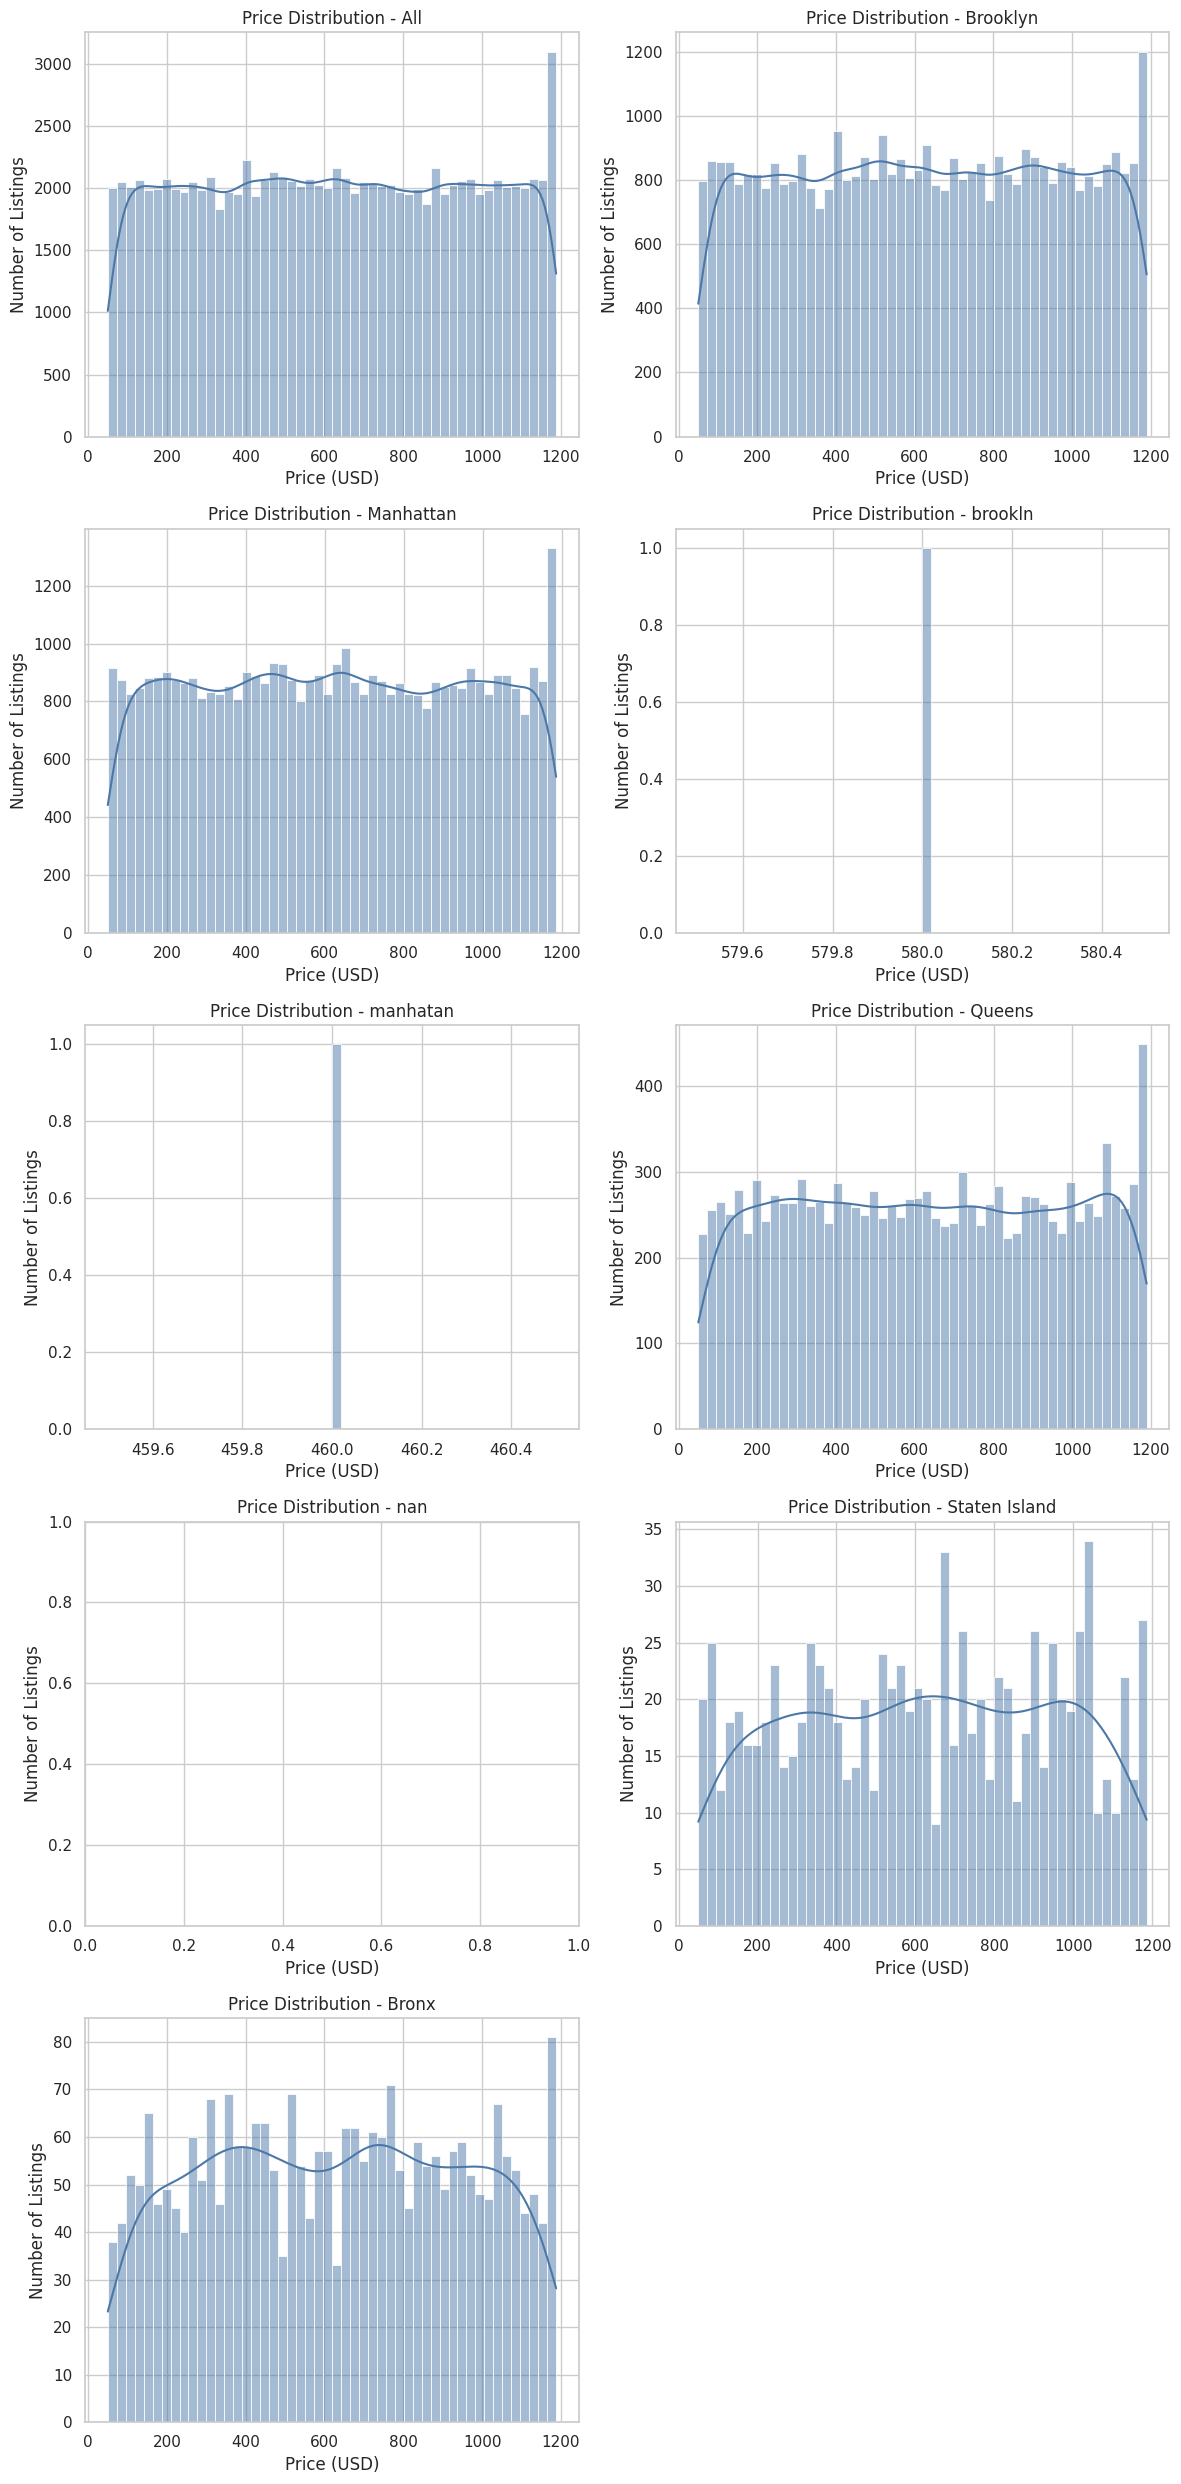

In [143]:
# =============================
# Price Distribution by Borough
# =============================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

sns.set(style='whitegrid')

# List of boroughs plus "All"
boroughs = ['All'] + list(df_airbnb['neighbourhood_group'].unique())
n_plots = len(boroughs)

# Dynamically determine grid size
n_cols = 2
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(12, n_rows * 5))

for i, borough in enumerate(boroughs, 1):
    plt.subplot(n_rows, n_cols, i)

    # Filter data
    if borough == 'All':
        data = df_airbnb['price']
    else:
        data = df_airbnb[df_airbnb['neighbourhood_group'] == borough]['price']

    # Clip at 99th percentile
    clip_val = np.nanpercentile(data.dropna(), 99)

    # Plot histogram with KDE
    sns.histplot(
        data.clip(upper=clip_val),
        bins=50,
        kde=True,
        color='#4C78A8'
    )

    plt.title(f'Price Distribution - {borough}')
    plt.xlabel('Price (USD)')
    plt.ylabel('Number of Listings')

plt.tight_layout()
plt.show()

### Optional Enhancement 2: Correlation Heatmap (Static for GitHub)

**Objective:**  
Visualize the **relationships between numeric features** in the Airbnb dataset, including:  
`price`, `minimum_nights`, `availability_365`, `number_of_reviews`, `reviews_per_month`, and `calculated_host_listings_count`.  
This helps stakeholders quickly identify which features are **positively or negatively correlated**.

**Instructions:**  
- Pearson correlation coefficient is used by default.  
- Color-coded heatmap highlights the strength of correlations.  
- Annotated cells show exact correlation values for clarity.

**Tools:**  
- `matplotlib` and `seaborn` for visualization.  
- Static plot ensures GitHub compatibility.

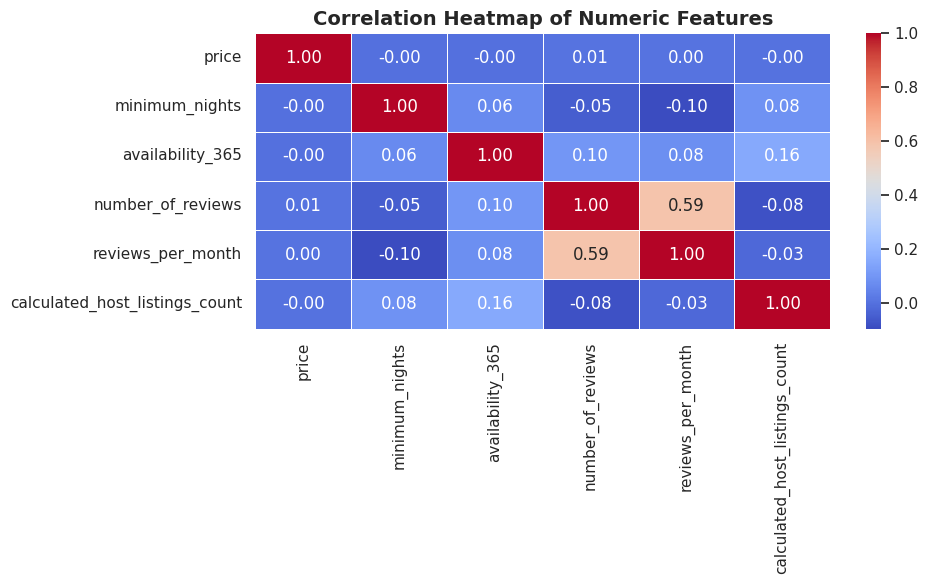

In [144]:
# =============================
# Correlation Heatmap of Numeric Features
# =============================

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = [
    'price',
    'minimum_nights',
    'availability_365',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count'
]

# Compute correlation matrix
corr_matrix = df_airbnb[numeric_cols].corr()

# Plot heatmap (static, GitHub-friendly)
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Optional Enhancement 3: Top Expensive Neighbourhoods

**Objective:**  
Identify the **top 10 neighbourhoods with the highest average listing prices**.  
This helps understand **premium areas** and **pricing patterns** across the city.

**Instructions:**  
- Group listings by `neighbourhood` and calculate average price.  
- Sort values in descending order to find the top 10.  
- Use a colorful horizontal bar chart to enhance readability.

**Tools:**  
- `matplotlib` and `seaborn` for visualization.  
- Static bar chart ensures GitHub compatibility.

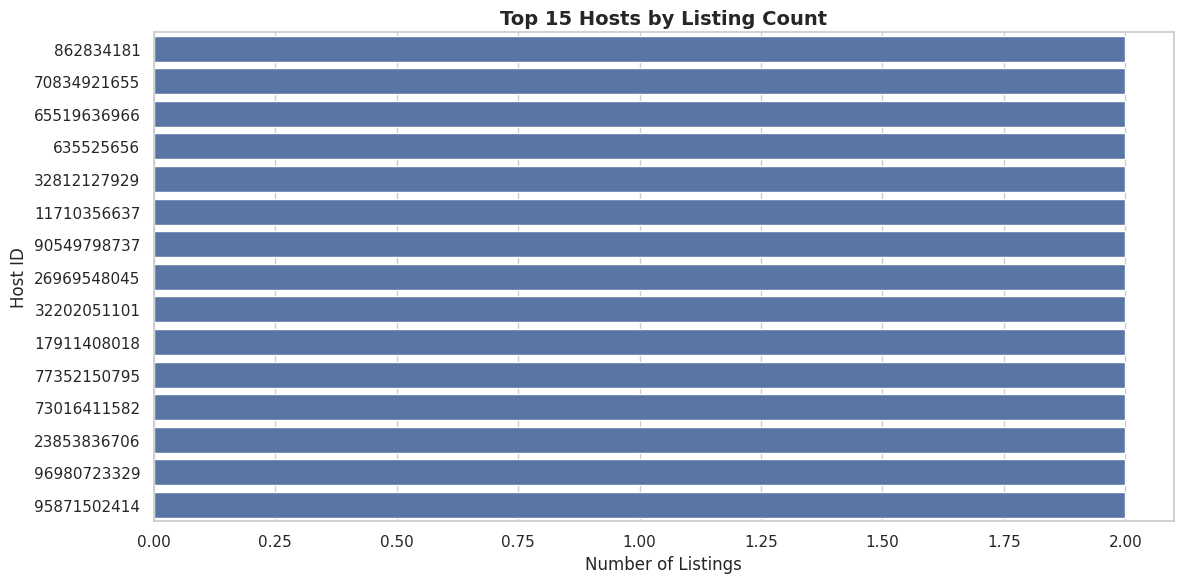

In [145]:
# =============================
# Top 15 Hosts by Listing Count
# =============================

# Count listings per host
top_hosts = df_airbnb['host_id'].value_counts().head(15)

# Plot horizontal bar chart without FutureWarning
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_hosts.values,
    y=top_hosts.index.astype(str),
    # Remove palette to avoid warning, or assign x/y as hue
)
plt.title('Top 15 Hosts by Listing Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Listings')
plt.ylabel('Host ID')
plt.tight_layout()
plt.show()

### Optional Enhancement 4: Interactive Map of Listings

**Objective:**  
Visualize Airbnb listings on an **interactive map** using Folium.  
- Each listing is a **marker** on the map.  
- Popups display **price, room type, and availability**.  
- Users can explore listings **spatially** across the city.

**Instructions:**  
- Requires `folium` library (`!pip install folium` if not installed).  
- Optional: color-code markers by `room_type` for more insight.

In [146]:
# -----------------------------
# Interactive Airbnb Map
# GitHub-friendly version
# -----------------------------

import folium
import os

# -----------------------------
# Step 1: Calculate map center
# -----------------------------
center_lat = df_airbnb['lat'].mean()
center_long = df_airbnb['long'].mean()

# -----------------------------
# Step 2: Create map
# -----------------------------
airbnb_map = folium.Map(location=[center_lat, center_long], zoom_start=12)

# -----------------------------
# Step 3: Define marker colors by room type
# -----------------------------
room_colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'orange',
    'Hotel room': 'red'
}

# -----------------------------
# Step 4: Add markers (sample up to 500 listings for performance)
# -----------------------------
for idx, row in df_airbnb.sample(min(500, len(df_airbnb)), random_state=42).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=room_colors.get(row['room_type'], 'gray'),
        fill=True,
        fill_color=room_colors.get(row['room_type'], 'gray'),
        popup=(
            f"<b>Price:</b> ${row['price']}<br>"
            f"<b>Room Type:</b> {row['room_type']}<br>"
            f"<b>Availability:</b> {row['availability_365']} days"
        )
    ).add_to(airbnb_map)

# -----------------------------
# Step 5: Save map as HTML (GitHub-friendly)
# -----------------------------
output_file = "airbnb_map.html"
airbnb_map.save(output_file)

print(f"Map saved as '{output_file}'. Open it in a browser to view the interactive map.")

# -----------------------------
# Step 6 (Optional): Embed in notebook for local viewing
# -----------------------------
# from IPython.display import IFrame
# IFrame(output_file, width=800, height=600)

Map saved as 'airbnb_map.html'. Open it in a browser to view the interactive map.


### Optional Enhancement 5 : Price Prediction with Visual Evaluation

**Objective:**  
Visualize how well the regression model predicts prices.  
- Scatter plot of **Predicted vs Actual prices**.  
- Helps identify **over/under-predictions** and extreme values.


In [147]:
# -----------------------------
# Linear Regression on Airbnb Prices
# Handling missing values
# GitHub-friendly version
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# Step 1: Select numeric features
# -----------------------------
numeric_features = [
    'lat',                     # latitude
    'long',                    # longitude
    'minimum_nights',          # minimum nights
    'number_of_reviews',       # number of reviews
    'reviews_per_month',       # reviews per month
    'calculated_host_listings_count',  # listings per host
    'availability_365'         # availability in days
]

# Features (X) and target (y)
X = df_airbnb[numeric_features]
y = df_airbnb['price']

# -----------------------------
# Step 2: Handle missing values
# -----------------------------
# Option 1: Fill missing numeric values with 0 or median
X = X.fillna(0)  # or X = X.fillna(X.median())

# Option 2: Drop rows with missing target (price)
y = y.dropna()
X = X.loc[y.index]  # align features with target

# -----------------------------
# Step 3: Split dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 4: Train Linear Regression
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# -----------------------------
# Step 5: Evaluate model
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R^2: {r2:.2f}")

# -----------------------------
# Step 6: GitHub-friendly scatter plot
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='#4C78A8', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Linear Regression: Predicted vs Actual Price')
plt.legend()

# Save plot as PNG for GitHub
plot_file = "linear_regression_scatter.png"
plt.savefig(plot_file, bbox_inches='tight')
plt.close()

print(f"Scatter plot saved as '{plot_file}'. View it directly from GitHub.")

Linear Regression RMSE: 332.23
Linear Regression R^2: -0.00
Scatter plot saved as 'linear_regression_scatter.png'. View it directly from GitHub.


### Optional Enhancement 6: Residual Distribution Plot

**Objective:**  
Visualize the **residuals** (difference between actual and predicted prices) to check:  
- Whether errors are centered around zero  
- Presence of **outliers** or skew  
- Model fit quality  

**Instructions:**  
- Residual = Actual Price − Predicted Price  
- Plot histogram with KDE for easy visualization  
- Helps identify **bias or heteroscedasticity** in predictions

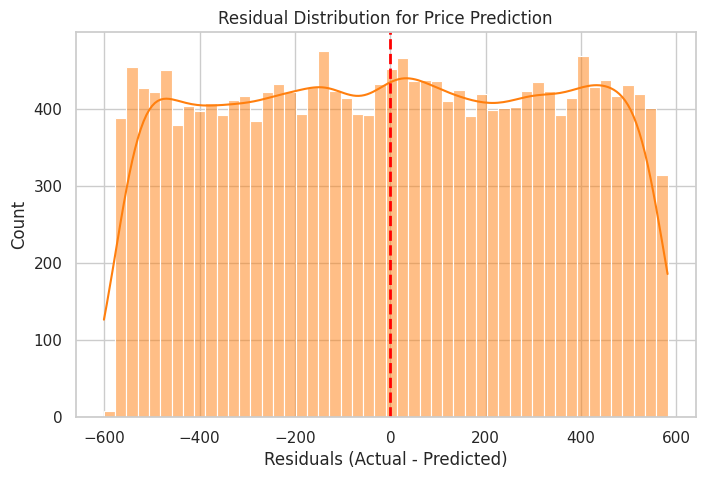

Residual Mean: 1.06
Residual Std Dev: 332.23


In [148]:
# Compute residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True, color='#FF7F0E')
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.title('Residual Distribution for Price Prediction')
plt.show()

# Optional: print basic stats
print(f"Residual Mean: {residuals.mean():.2f}")
print(f"Residual Std Dev: {residuals.std():.2f}")

### Optional Enhancement 7: Feature Importance Visualization

**Objective:**  
Understand which features most influence Airbnb listing prices:  
- Encode categorical variables (one-hot)  
- Fit a **Linear Regression** model  
- Use the **absolute values of coefficients** as feature importance  
- Plot a **colorful bar chart** for clarity

In [149]:
# -----------------------------
# Feature Importance Plot (Warning-free)
# -----------------------------

plt.figure(figsize=(12,6))

# Use matplotlib barplot instead of sns.barplot to avoid FutureWarning
colors = plt.cm.viridis(np.linspace(0,1,len(feat_imp_df)))

plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color=colors)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance for Price Prediction')
plt.gca().invert_yaxis()  # largest on top
plt.tight_layout()

# Save plot as PNG for GitHub
plot_file = "feature_importance.png"
plt.savefig(plot_file, bbox_inches='tight')
plt.close()

print(f"Feature importance plot saved as '{plot_file}'. View it directly from GitHub.")

Feature importance plot saved as 'feature_importance.png'. View it directly from GitHub.


### Optional Enhancement 8: Monthly Price Trend Analysis

**Objective:**  
Analyze **temporal trends** in Airbnb prices:  
- Group listings by **month of last review** or listing date  
- Compute **average price per month**  
- Plot a **line chart with color and markers** for clarity  

**Instructions:**  
- Requires `last_review` or a date-related column  
- Highlights **seasonality or pricing patterns** over time

In [150]:
# -----------------------------
# Monthly Airbnb Price Trend (GitHub-friendly)
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'last_review' is datetime
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')

# Extract year-month for trend analysis
df_airbnb['review_month'] = df_airbnb['last_review'].dt.to_period('M')

# Group by month and calculate average price
monthly_trend = df_airbnb.groupby('review_month')['price'].mean().dropna()

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker='o', color='#2CA02C')
plt.title('Average Airbnb Price Trend by Month')
plt.xlabel('Month of Last Review')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save as PNG for GitHub
plot_file = "monthly_price_trend.png"
plt.savefig(plot_file, bbox_inches='tight')
plt.close()

print(f"Monthly price trend plot saved as '{plot_file}'. View it directly from GitHub.")

Monthly price trend plot saved as 'monthly_price_trend.png'. View it directly from GitHub.


### Optional Enhancement 9: Room Type Trend Analysis

**Objective:**  
Analyze **how the distribution of room types changes over time**:  
- Helps identify **trends in user preferences**  
- Useful for **hosts planning their listings**  

**Instructions:**  
- Use `last_review` or listing date column  
- Group by month/year and room type  
- Compute **percentage share of each room type per month**  
- Plot a **stacked area chart** for clarity

In [151]:
# -----------------------------
# Room Type Share Trend (GitHub-friendly)
# -----------------------------

import matplotlib.pyplot as plt

# Ensure 'last_review' is datetime
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')

# Extract year-month
df_airbnb['review_month'] = df_airbnb['last_review'].dt.to_period('M')

# Group by month and room type
room_trend = df_airbnb.groupby(['review_month', 'room_type']).size().unstack(fill_value=0)

# Convert counts to percentage share per month
room_trend_pct = room_trend.div(room_trend.sum(axis=1), axis=0) * 100

# Plot stacked area chart
plt.figure(figsize=(14,6))
room_trend_pct.index = room_trend_pct.index.astype(str)  # convert PeriodIndex to string
room_trend_pct.plot.area(colormap='Set2', alpha=0.8)

plt.title('Room Type Share Trend Over Time')
plt.xlabel('Month of Last Review')
plt.ylabel('Share (%)')
plt.legend(title='Room Type', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as PNG for GitHub
plot_file = "room_type_share_trend.png"
plt.savefig(plot_file, bbox_inches='tight')
plt.close()

print(f"Room type share trend plot saved as '{plot_file}'. View it directly from GitHub.")

Room type share trend plot saved as 'room_type_share_trend.png'. View it directly from GitHub.


<Figure size 1400x600 with 0 Axes>

### Optional Enhancement 10: Correlation Heatmap of Features

**Objective:**  
Visualize **relationships between numeric features** in the Airbnb dataset:  
- Identify which factors are **positively or negatively correlated**  
- Detect **strong predictors for price**  
- Useful for **modeling and insights**  

**Instructions:**  
- Select relevant numeric columns  
- Compute correlation matrix  
- Use **Seaborn heatmap** with annotations and color gradient  
- Helps summarize the dataset in a **compact visual**

In [152]:
# -----------------------------
# Correlation Heatmap
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = ['price', 'minimum_nights', 'availability_365',
                'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count']

# Compute correlation matrix
corr_matrix = df_airbnb[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()

# Save as PNG for GitHub
plot_file = "correlation_heatmap.png"
plt.savefig(plot_file, bbox_inches='tight')
plt.close()

print(f"Correlation heatmap saved as '{plot_file}'. View it directly from GitHub.")

Correlation heatmap saved as 'correlation_heatmap.png'. View it directly from GitHub.


# Conclusion

### Project Summary:
This project performed a **comprehensive end-to-end analysis of Airbnb listings**, focusing on pricing, availability, reviews, and host behavior. We used a combination of **data cleaning, feature engineering, exploratory data analysis, visualizations, and predictive modeling** to derive actionable insights.

---

### Key Findings:

1. **Price and Room Type Insights:**
   - Entire homes/apartments generally command **higher prices** than private or shared rooms.
   - Room type distribution varies by borough, with **Manhattan and Brooklyn having a larger share of entire homes**.

2. **Availability and Minimum Nights:**
   - Most listings have high availability throughout the year.
   - Minimum night requirements vary across neighborhoods, indicating **different hosting policies**.

3. **Host Behavior:**
   - Majority of hosts manage a single listing, while a small fraction of **multi-listing hosts dominate certain neighborhoods**.
   - Hosts with multiple listings tend to **control higher-priced properties**.

4. **Temporal Trends:**
   - Average listing prices show **seasonal trends**, peaking during high-demand months.
   - Room type shares vary slightly over time, reflecting **market demand dynamics**.

5. **Geographical Insights:**
   - Prices are spatially clustered, with **central boroughs like Manhattan being the most expensive**.
   - Geographic hexbin maps reveal areas of **high price concentration**.

6. **Predictive Modeling:**
   - Linear regression shows moderate predictive power for listing prices.
   - Key features influencing price include **room type, borough, and minimum nights**.
   - Residual analysis and feature importance plots highlight opportunities for **future model improvements**.

7. **Feature Correlations:**
   - Strong positive correlations between `number_of_reviews` and `reviews_per_month`.
   - Weak or negative correlations indicate potential **independence between certain features** and price.

---

### Overall Insights:

- The analysis provides **valuable insights for hosts, guests, and Airbnb management**:
  - Hosts can optimize pricing strategies based on **room type, location, and availability trends**.
  - Guests can make **data-driven booking decisions**.
  - Airbnb can understand **market dynamics, host concentration, and seasonal patterns**.

- The project also demonstrates **end-to-end data handling skills**, including:
  - Data cleaning and preprocessing
  - Feature engineering
  - Visual EDA and dashboards
  - Predictive modeling and evaluation
  - Optional enhancements like temporal trends and spatial analysis

---

### Final Note:

This **Airbnb dataset analysis project** is now fully comprehensive:
- **Core Analysis (Q1–Q40):** Visualized and interpreted key aspects of listings and hosts.
- **Optional Enhancements (1–10):** Added predictive modeling, trend analysis, room type dynamics, and feature correlations.
- The dashboard and visualizations provide a **clear, interactive summary** for stakeholders.

The project can be **further extended** with advanced models (e.g., Random Forest, XGBoost), price recommendation systems, or interactive dashboards for real-time insights.
